## Computer vision 
### Detect the marked boxes

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
import cv2 as cv
import numpy as np
import glob
import os
import pickle
import matplotlib.pyplot as plt
# from google.colab.patches import cv2_imshow
from IPython.display import clear_output, Image, display
import PIL.Image
import io

In [4]:
base_folder = './Materials/images/' # change this on your machine
images = glob.glob(os.path.join(base_folder, "image_*.jpg")) 
char_to_index = {'A': 0, 'B': 1, 'C': 2, 'D': 3}

In [5]:
# images

In [6]:
# we assume that we have run an algorithm for finding horizontal and vertical lines 
# for the two frames (left - MATEMATICA and right - INFORMATICA or FIZICA) in the image

# show this on one image
image_name = 'image_21'

# load vertical lines
vertical_lines_left = pickle.load(open((base_folder + image_name + '_vertical_lines_left.pkl'), 'rb'))
print('Vertical lines for the left frame:\n', vertical_lines_left)
vertical_lines_right = pickle.load(open((base_folder + image_name + '_vertical_lines_right.pkl'), 'rb'))

# load horizontal lines
horizontal_lines_left = pickle.load(open((base_folder + image_name + '_horizontal_lines_left.pkl'), 'rb'))
print('Horizontal lines for the left frame:\n', horizontal_lines_left)
horizontal_lines_right = pickle.load(open((base_folder + image_name + '_horizontal_lines_right.pkl'), 'rb'))

Vertical lines for the left frame:
 [[(901, 0), (901, 2808)], [(1046, 0), (1046, 2808)], [(1186, 0), (1186, 2808)], [(1331, 0), (1331, 2808)], [(1479, 0), (1479, 2808)]]
Horizontal lines for the left frame:
 [[(0, 941), (2066, 941)], [(0, 1055), (2066, 1055)], [(0, 1171), (2066, 1171)], [(0, 1288), (2066, 1288)], [(0, 1398), (2066, 1398)], [(0, 1511), (2066, 1511)], [(0, 1625), (2066, 1625)], [(0, 1738), (2066, 1738)], [(0, 1851), (2066, 1851)], [(0, 1965), (2066, 1965)], [(0, 2081), (2066, 2081)], [(0, 2195), (2066, 2195)], [(0, 2308), (2066, 2308)], [(0, 2418), (2066, 2418)], [(0, 2531), (2066, 2531)], [(0, 2651), (2066, 2651)]]


In [7]:
def showimage(a, fmt='jpeg'):
    a = np.uint8(np.clip(a, 0, 255))
    f = io.BytesIO()
    PIL.Image.fromarray(a).save(f, fmt)
    display(Image(data=f.getvalue()))

(5847, 4132, 3)


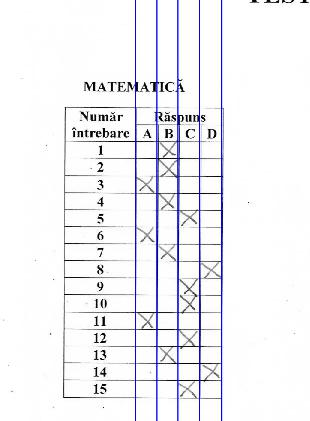

In [8]:
# plot the vertical lines in the left frame (MATEMATICA)
image = cv.imread(base_folder + image_name + '.jpg')
print(image.shape)

grayscale_image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
orig_h, orig_w = grayscale_image.shape  
grayscale_image = grayscale_image[int(0.4 * orig_h):int(0.88 * orig_h)] 

left_image = grayscale_image[:, :int(orig_w * 0.5)].copy()
left_image_color = np.dstack((left_image, left_image, left_image))

for i in range(len(vertical_lines_left)):
    cv.line(left_image_color,vertical_lines_left[i][0],vertical_lines_left[i][1],(0,0,255),5)

showimage(cv.resize(left_image_color, (0, 0), fx=0.15, fy=0.15))
#cv.waitKey(0)
#cv.destroyAllWindows()

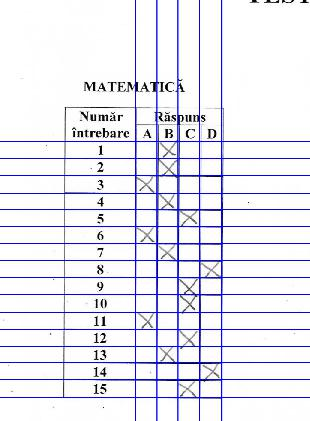

In [9]:
# plot the horizontal lines in the left frame (MATEMATICA)
for i in range(len(horizontal_lines_left)):
     cv.line(left_image_color,horizontal_lines_left[i][0],horizontal_lines_left[i][1],(0,0,255),5)

showimage(cv.resize(left_image_color, (0, 0), fx=0.15, fy=0.15))
#cv.waitKey(0)
#cv.destroyAllWindows()

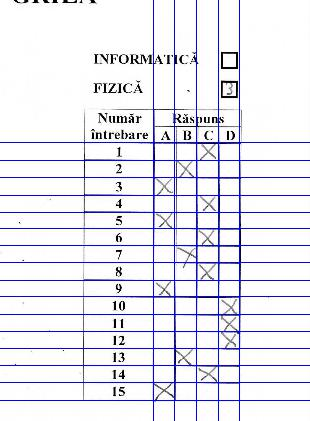

In [10]:
# plot the vertical and horizontal lines in the right frame (INFORMATICA or FIZICA)
right_image = grayscale_image[:, int(orig_w * 0.5):].copy()
right_image_color = np.dstack((right_image, right_image, right_image))

for i in range(len(vertical_lines_right)):
    cv.line(right_image_color,vertical_lines_right[i][0],vertical_lines_right[i][1],(0,0,255),5)

for i in range(len(horizontal_lines_right)):
     cv.line(right_image_color,horizontal_lines_right[i][0],horizontal_lines_right[i][1],(0,0,255),5)

showimage(cv.resize(right_image_color, (0, 0), fx=0.15, fy=0.15))    
#cv.imshow("right_image_color", cv.resize(right_image_color, (0, 0), fx=0.15, fy=0.15))
#cv.waitKey(0)
#cv.destroyAllWindows()

In [11]:
# load the ground truth
ground_truth_content = np.loadtxt(os.path.join(base_folder, '%s.txt' % image_name), dtype=str)
print(ground_truth_content.shape)
# obtain the correct answers for the left frame (MATEMATICA)
ground_truth_left = ground_truth_content[1:16]
# print the correct answers for the left frame (MATEMATICA)
print(ground_truth_left)
print(char_to_index[ground_truth_left[0][1]])

(32, 2)
[['1' 'B']
 ['2' 'B']
 ['3' 'A']
 ['4' 'B']
 ['5' 'C']
 ['6' 'A']
 ['7' 'B']
 ['8' 'D']
 ['9' 'C']
 ['10' 'C']
 ['11' 'A']
 ['12' 'C']
 ['13' 'B']
 ['14' 'D']
 ['15' 'C']]
1


In [12]:
# obtain the correct answers for the right frame (INFORMATICA or FIZICA)
ground_truth_right = ground_truth_content[16:-1]
# print the correct answers for the right frame (INFORMATICA or FIZICA)
print(ground_truth_right)

[['16' 'C']
 ['17' 'B']
 ['18' 'A']
 ['19' 'C']
 ['20' 'A']
 ['21' 'C']
 ['22' 'B']
 ['23' 'C']
 ['24' 'A']
 ['25' 'D']
 ['26' 'D']
 ['27' 'D']
 ['28' 'B']
 ['29' 'C']
 ['30' 'A']]


In [23]:
# write a function that plots the patches containing X with green
# and patches containing blanks with red
# use here the ground thruth (train mode)
# return the mean pixel value of each patch containing X or a blank

def find_x_from_gt(grayscale_image, vertical_lines, horizontal_lines, ground_truth):
    # grayscale_image - input image containing the frame
    # vertical_lines - list with the vertical lines
    # horizontal_lines - list with horizontal lines
    # ground_truth - ground-truth content for a frame    
    mean_x = []
    mean_blank = [] 
    
    image = np.dstack((grayscale_image, grayscale_image, grayscale_image))
    x_color = (0, 255, 0)  # plot a patch containing an X with green color
    blank_color = (0, 0, 255)  # plot a patch containing a blank with red color    
            
    # crop each patch and display it
    for i in range(len(horizontal_lines) - 1):
        for j in range(len(vertical_lines) - 1):
            x_min = vertical_lines[j][0][0] +15
            x_max = vertical_lines[j + 1][1][0] - 5
            y_min = horizontal_lines[i][0][1] + 15
            y_max = horizontal_lines[i + 1][1][1] - 5
            
            patch = grayscale_image[y_min:y_max,x_min:x_max].copy()
            #print(patch.shape)

            mean_patch_value = np.round(patch.mean())

            if(char_to_index[ground_truth[i][1]] == j):
              mean_x.append(mean_patch_value)
              color = x_color

            else:
              mean_blank.append(mean_patch_value)
              color = blank_color


            cv.rectangle(image, (x_min, y_min), (x_max, y_max), color=color, thickness=5)
            cv.putText(image, str(mean_patch_value)[:3] ,(x_min + 10, y_min + 50), cv.FONT_HERSHEY_COMPLEX, 1, (0,0,0), 2) 
        
    showimage(cv.resize(image, (0, 0), fx=0.4, fy=0.3))
    #cv.waitKey(0)
    #cv.destroyAllWindows()  
        
    return mean_x, mean_blank

image_21


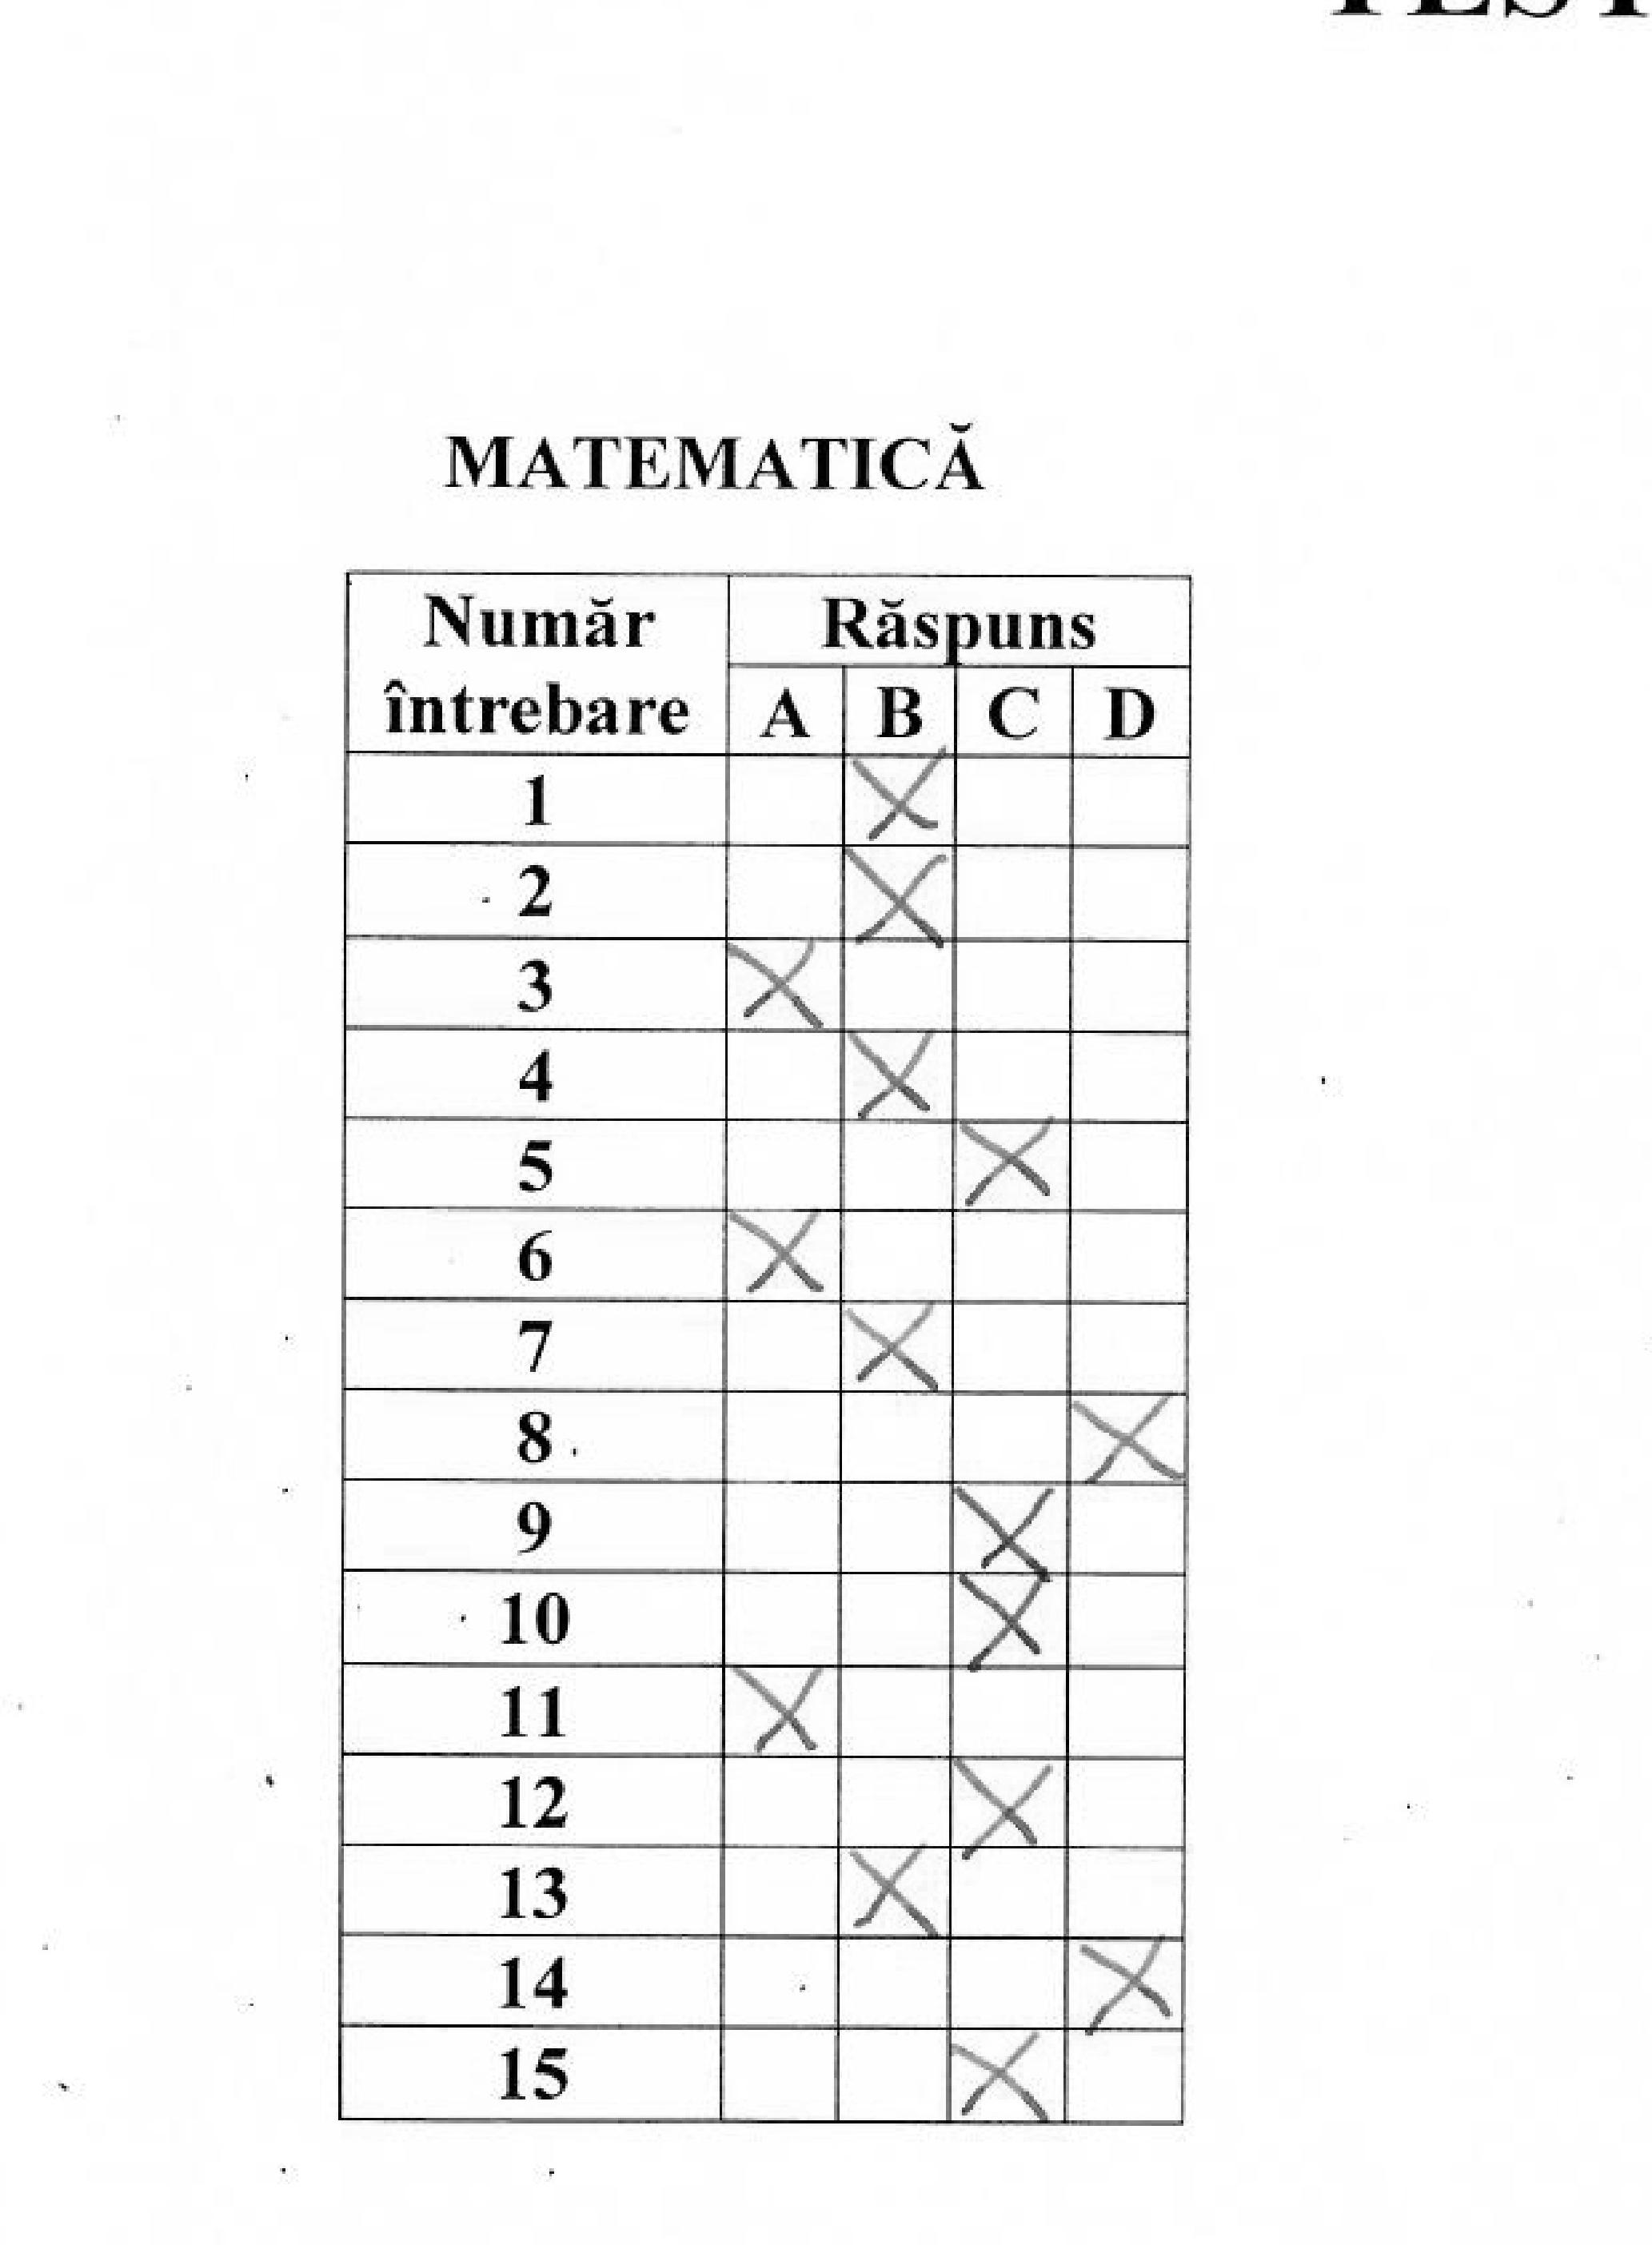

[[(901, 0), (901, 2808)], [(1046, 0), (1046, 2808)], [(1186, 0), (1186, 2808)], [(1331, 0), (1331, 2808)], [(1479, 0), (1479, 2808)]]
[[(0, 941), (2066, 941)], [(0, 1055), (2066, 1055)], [(0, 1171), (2066, 1171)], [(0, 1288), (2066, 1288)], [(0, 1398), (2066, 1398)], [(0, 1511), (2066, 1511)], [(0, 1625), (2066, 1625)], [(0, 1738), (2066, 1738)], [(0, 1851), (2066, 1851)], [(0, 1965), (2066, 1965)], [(0, 2081), (2066, 2081)], [(0, 2195), (2066, 2195)], [(0, 2308), (2066, 2308)], [(0, 2418), (2066, 2418)], [(0, 2531), (2066, 2531)], [(0, 2651), (2066, 2651)]]
[['1' 'B']
 ['2' 'B']
 ['3' 'A']
 ['4' 'B']
 ['5' 'C']
 ['6' 'A']
 ['7' 'B']
 ['8' 'D']
 ['9' 'C']
 ['10' 'C']
 ['11' 'A']
 ['12' 'C']
 ['13' 'B']
 ['14' 'D']
 ['15' 'C']]


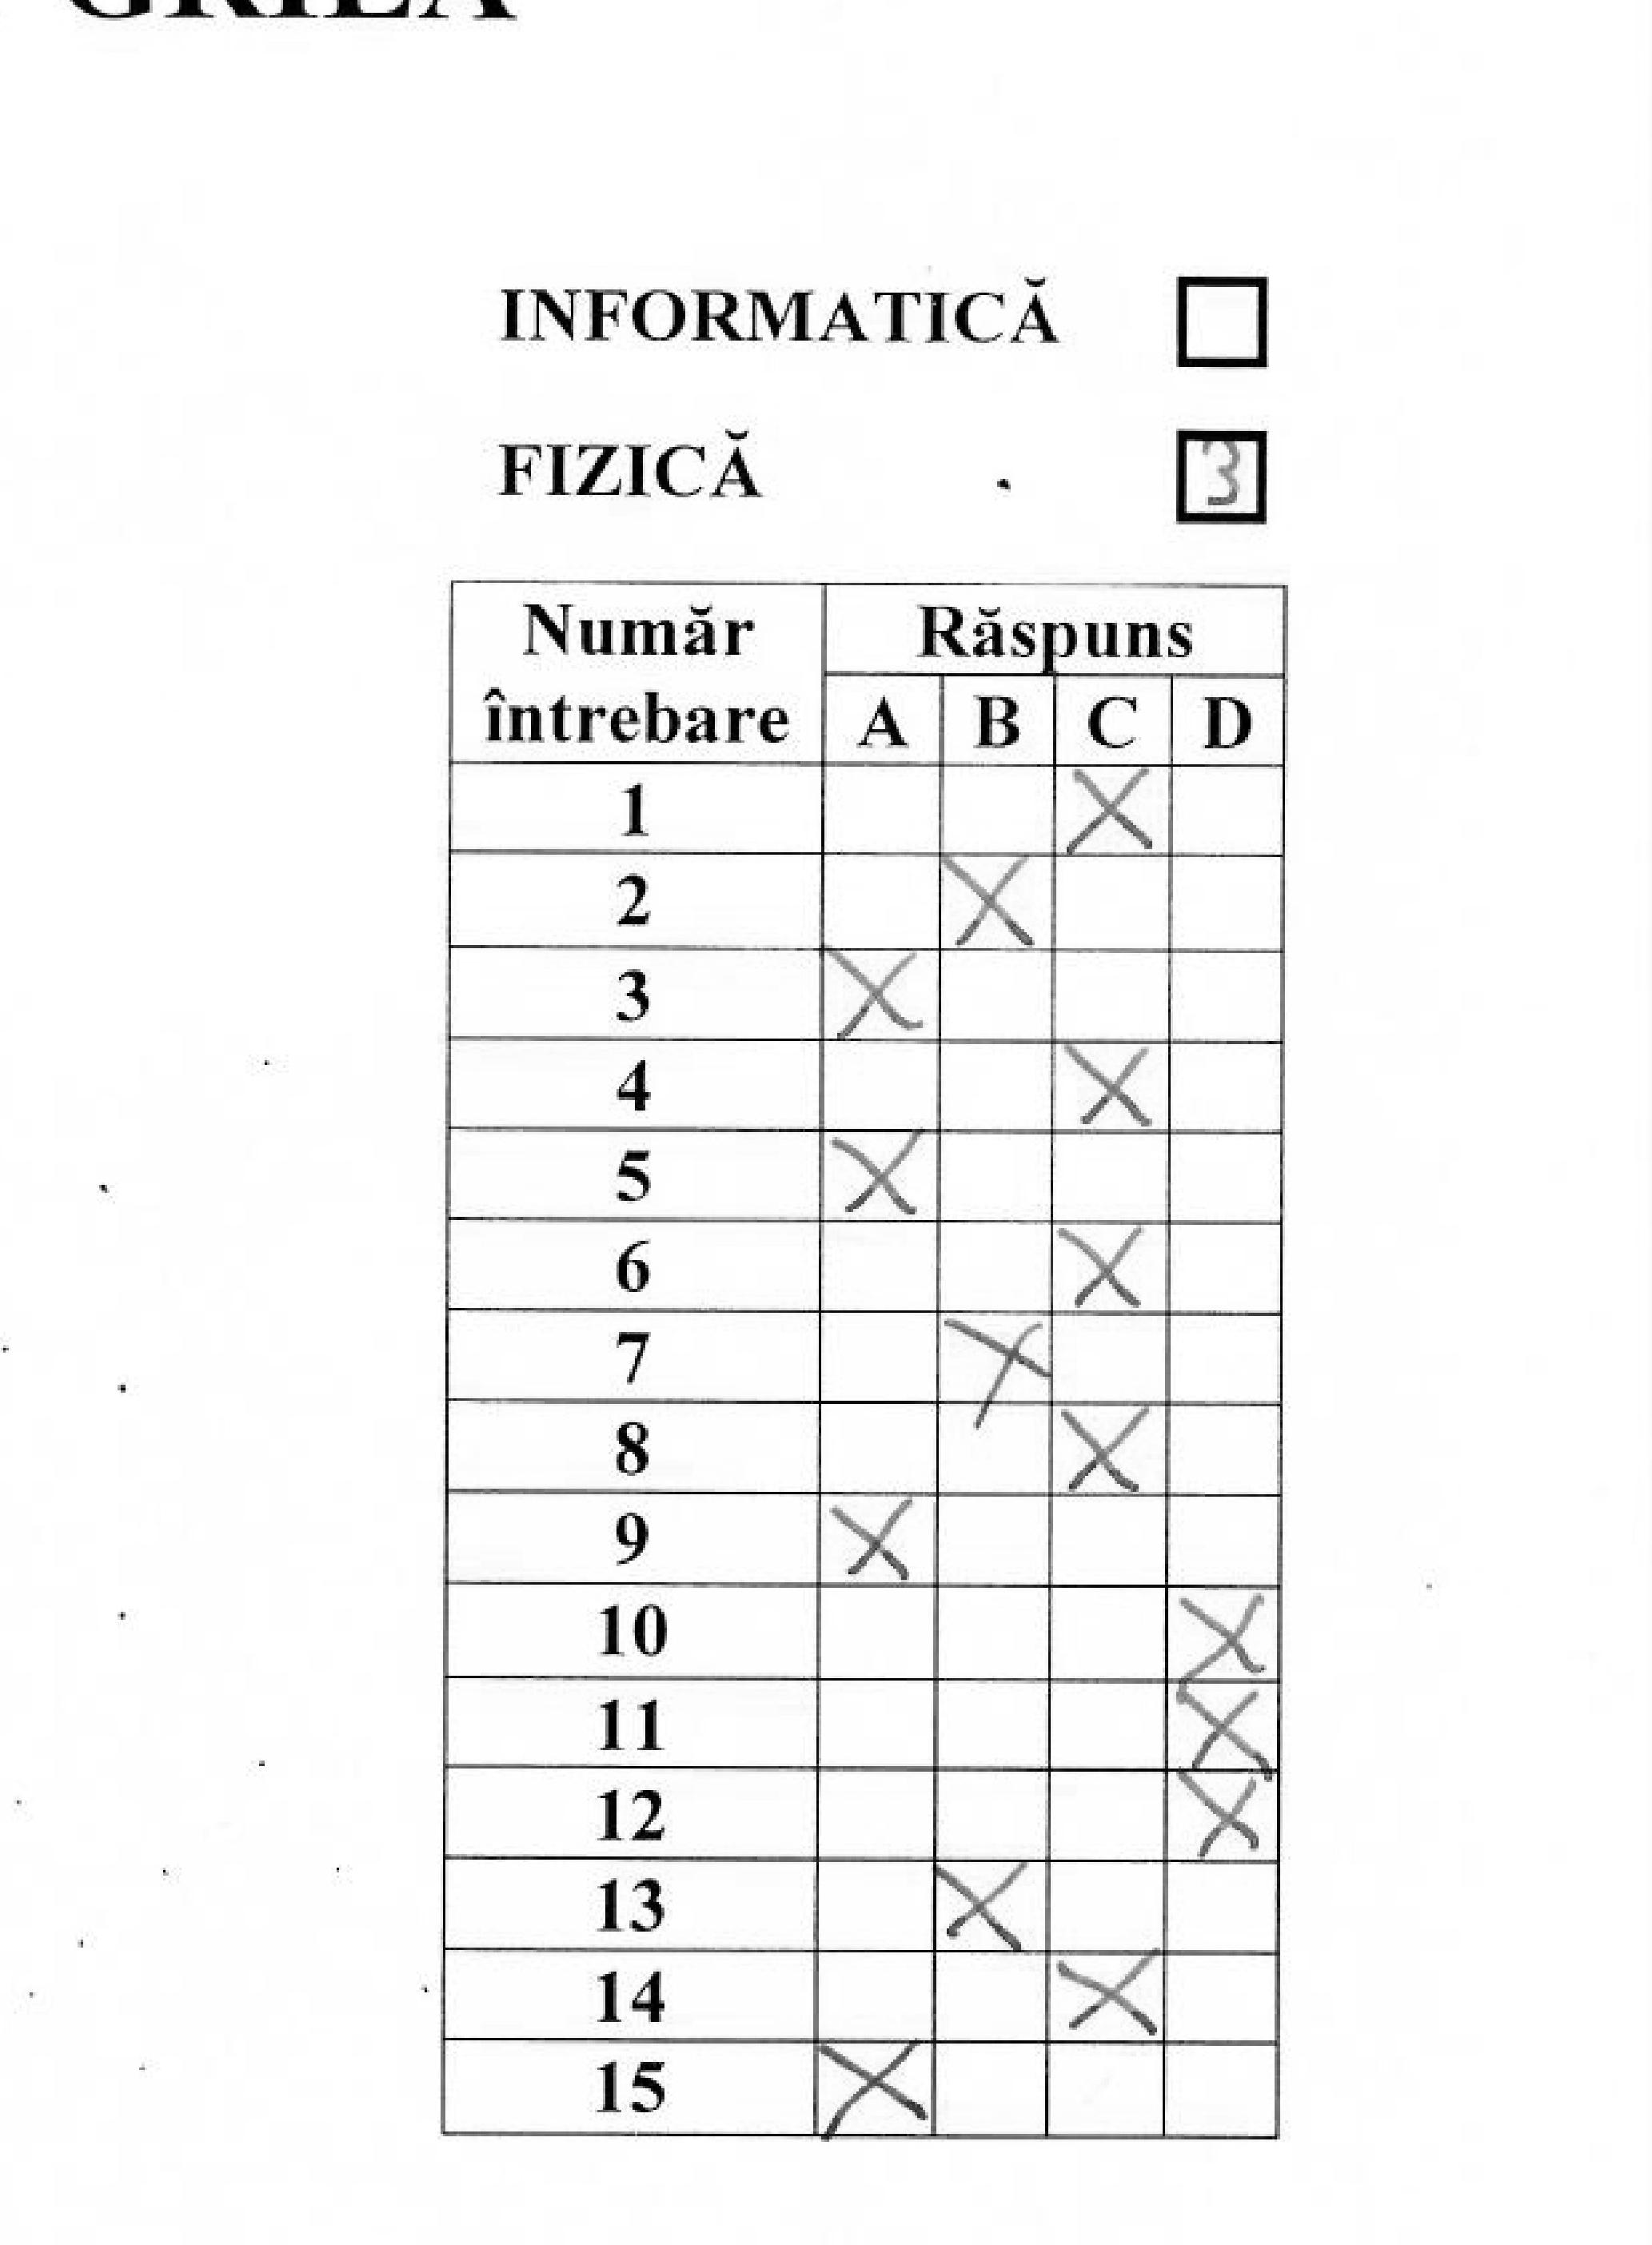

[[(1022, 0), (1022, 2808)], [(1165, 0), (1165, 2808)], [(1310, 0), (1310, 2808)], [(1455, 0), (1455, 2808)], [(1595, 0), (1595, 2808)]]
[[(0, 951), (2066, 951)], [(0, 1068), (2066, 1068)], [(0, 1185), (2066, 1185)], [(0, 1301), (2066, 1301)], [(0, 1415), (2066, 1415)], [(0, 1525), (2066, 1525)], [(0, 1638), (2066, 1638)], [(0, 1751), (2066, 1751)], [(0, 1868), (2066, 1868)], [(0, 1978), (2066, 1978)], [(0, 2098), (2066, 2098)], [(0, 2208), (2066, 2208)], [(0, 2325), (2066, 2325)], [(0, 2438), (2066, 2438)], [(0, 2551), (2066, 2551)], [(0, 2668), (2066, 2668)]]
[['16' 'C']
 ['17' 'B']
 ['18' 'A']
 ['19' 'C']
 ['20' 'A']
 ['21' 'C']
 ['22' 'B']
 ['23' 'C']
 ['24' 'A']
 ['25' 'D']
 ['26' 'D']
 ['27' 'D']
 ['28' 'B']
 ['29' 'C']
 ['30' 'A']]
image_22


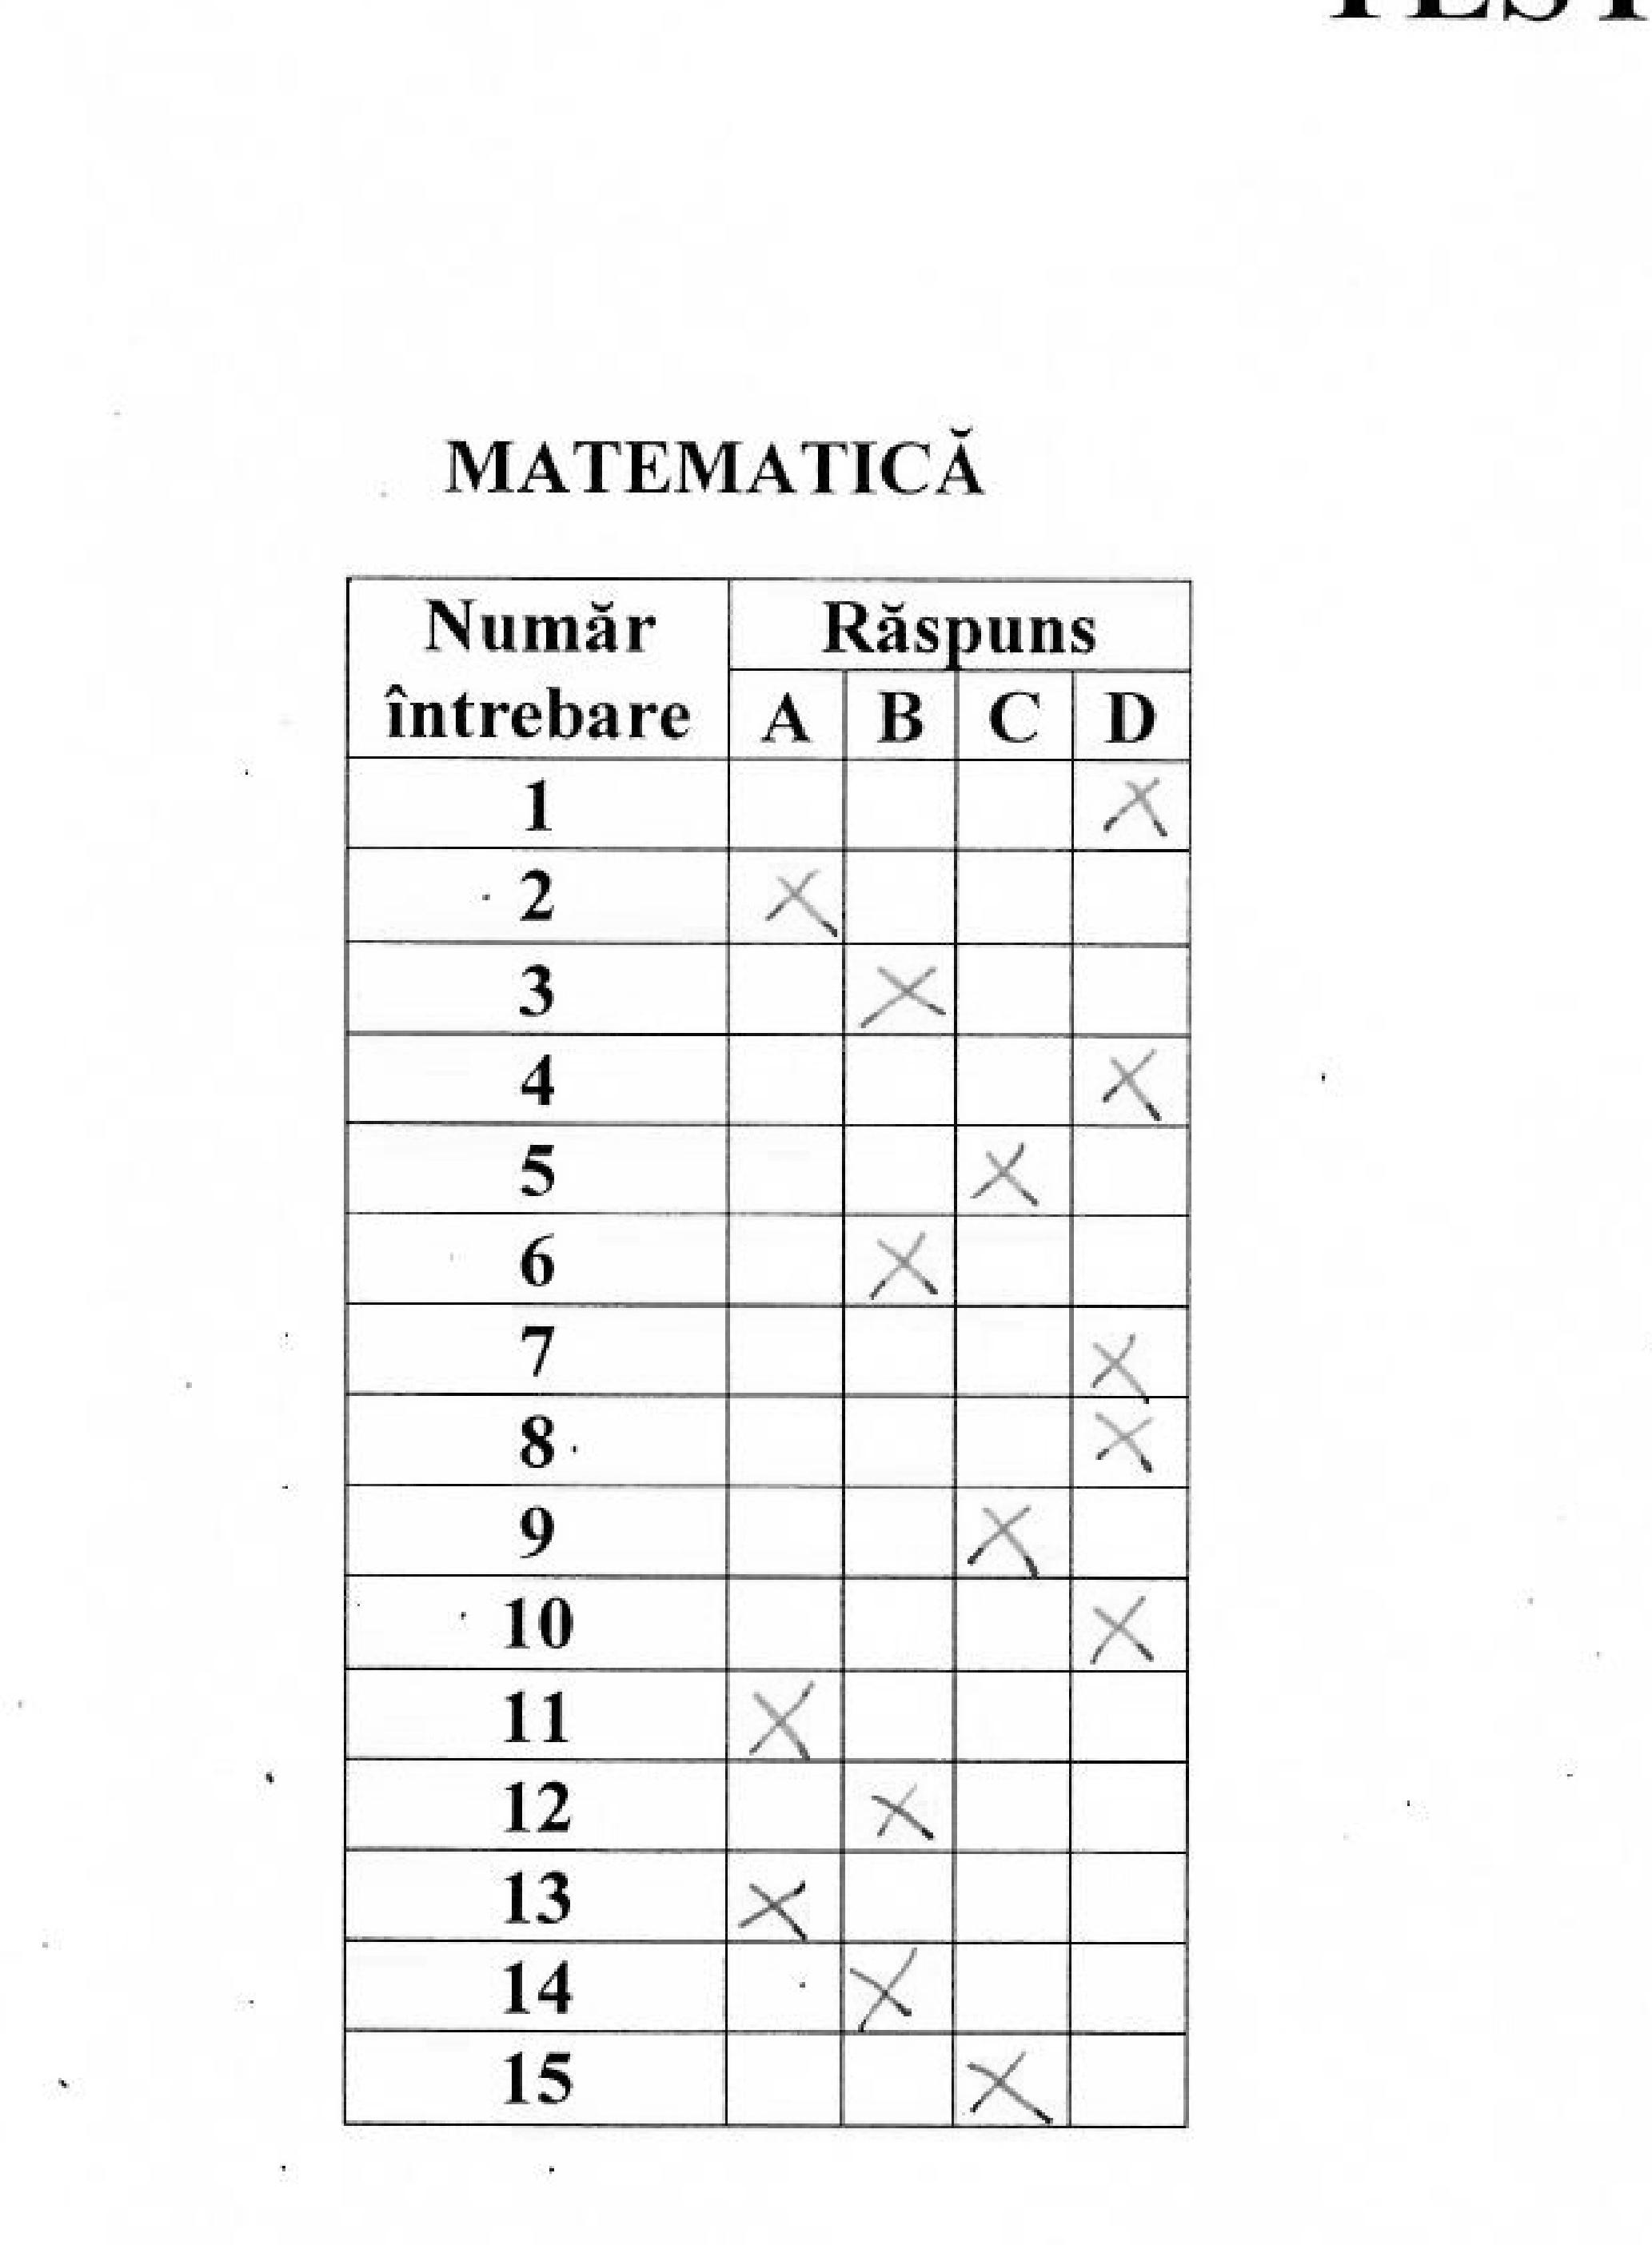

[[(905, 0), (905, 2808)], [(1051, 0), (1051, 2808)], [(1189, 0), (1189, 2808)], [(1335, 0), (1335, 2808)], [(1481, 0), (1481, 2808)]]
[[(0, 948), (2066, 948)], [(0, 1065), (2066, 1065)], [(0, 1178), (2066, 1178)], [(0, 1291), (2066, 1291)], [(0, 1405), (2066, 1405)], [(0, 1518), (2066, 1518)], [(0, 1631), (2066, 1631)], [(0, 1741), (2066, 1741)], [(0, 1858), (2066, 1858)], [(0, 1971), (2066, 1971)], [(0, 2085), (2066, 2085)], [(0, 2198), (2066, 2198)], [(0, 2311), (2066, 2311)], [(0, 2425), (2066, 2425)], [(0, 2538), (2066, 2538)], [(0, 2655), (2066, 2655)]]
[['1' 'D']
 ['2' 'A']
 ['3' 'B']
 ['4' 'D']
 ['5' 'C']
 ['6' 'B']
 ['7' 'D']
 ['8' 'D']
 ['9' 'C']
 ['10' 'D']
 ['11' 'A']
 ['12' 'B']
 ['13' 'A']
 ['14' 'B']
 ['15' 'C']]


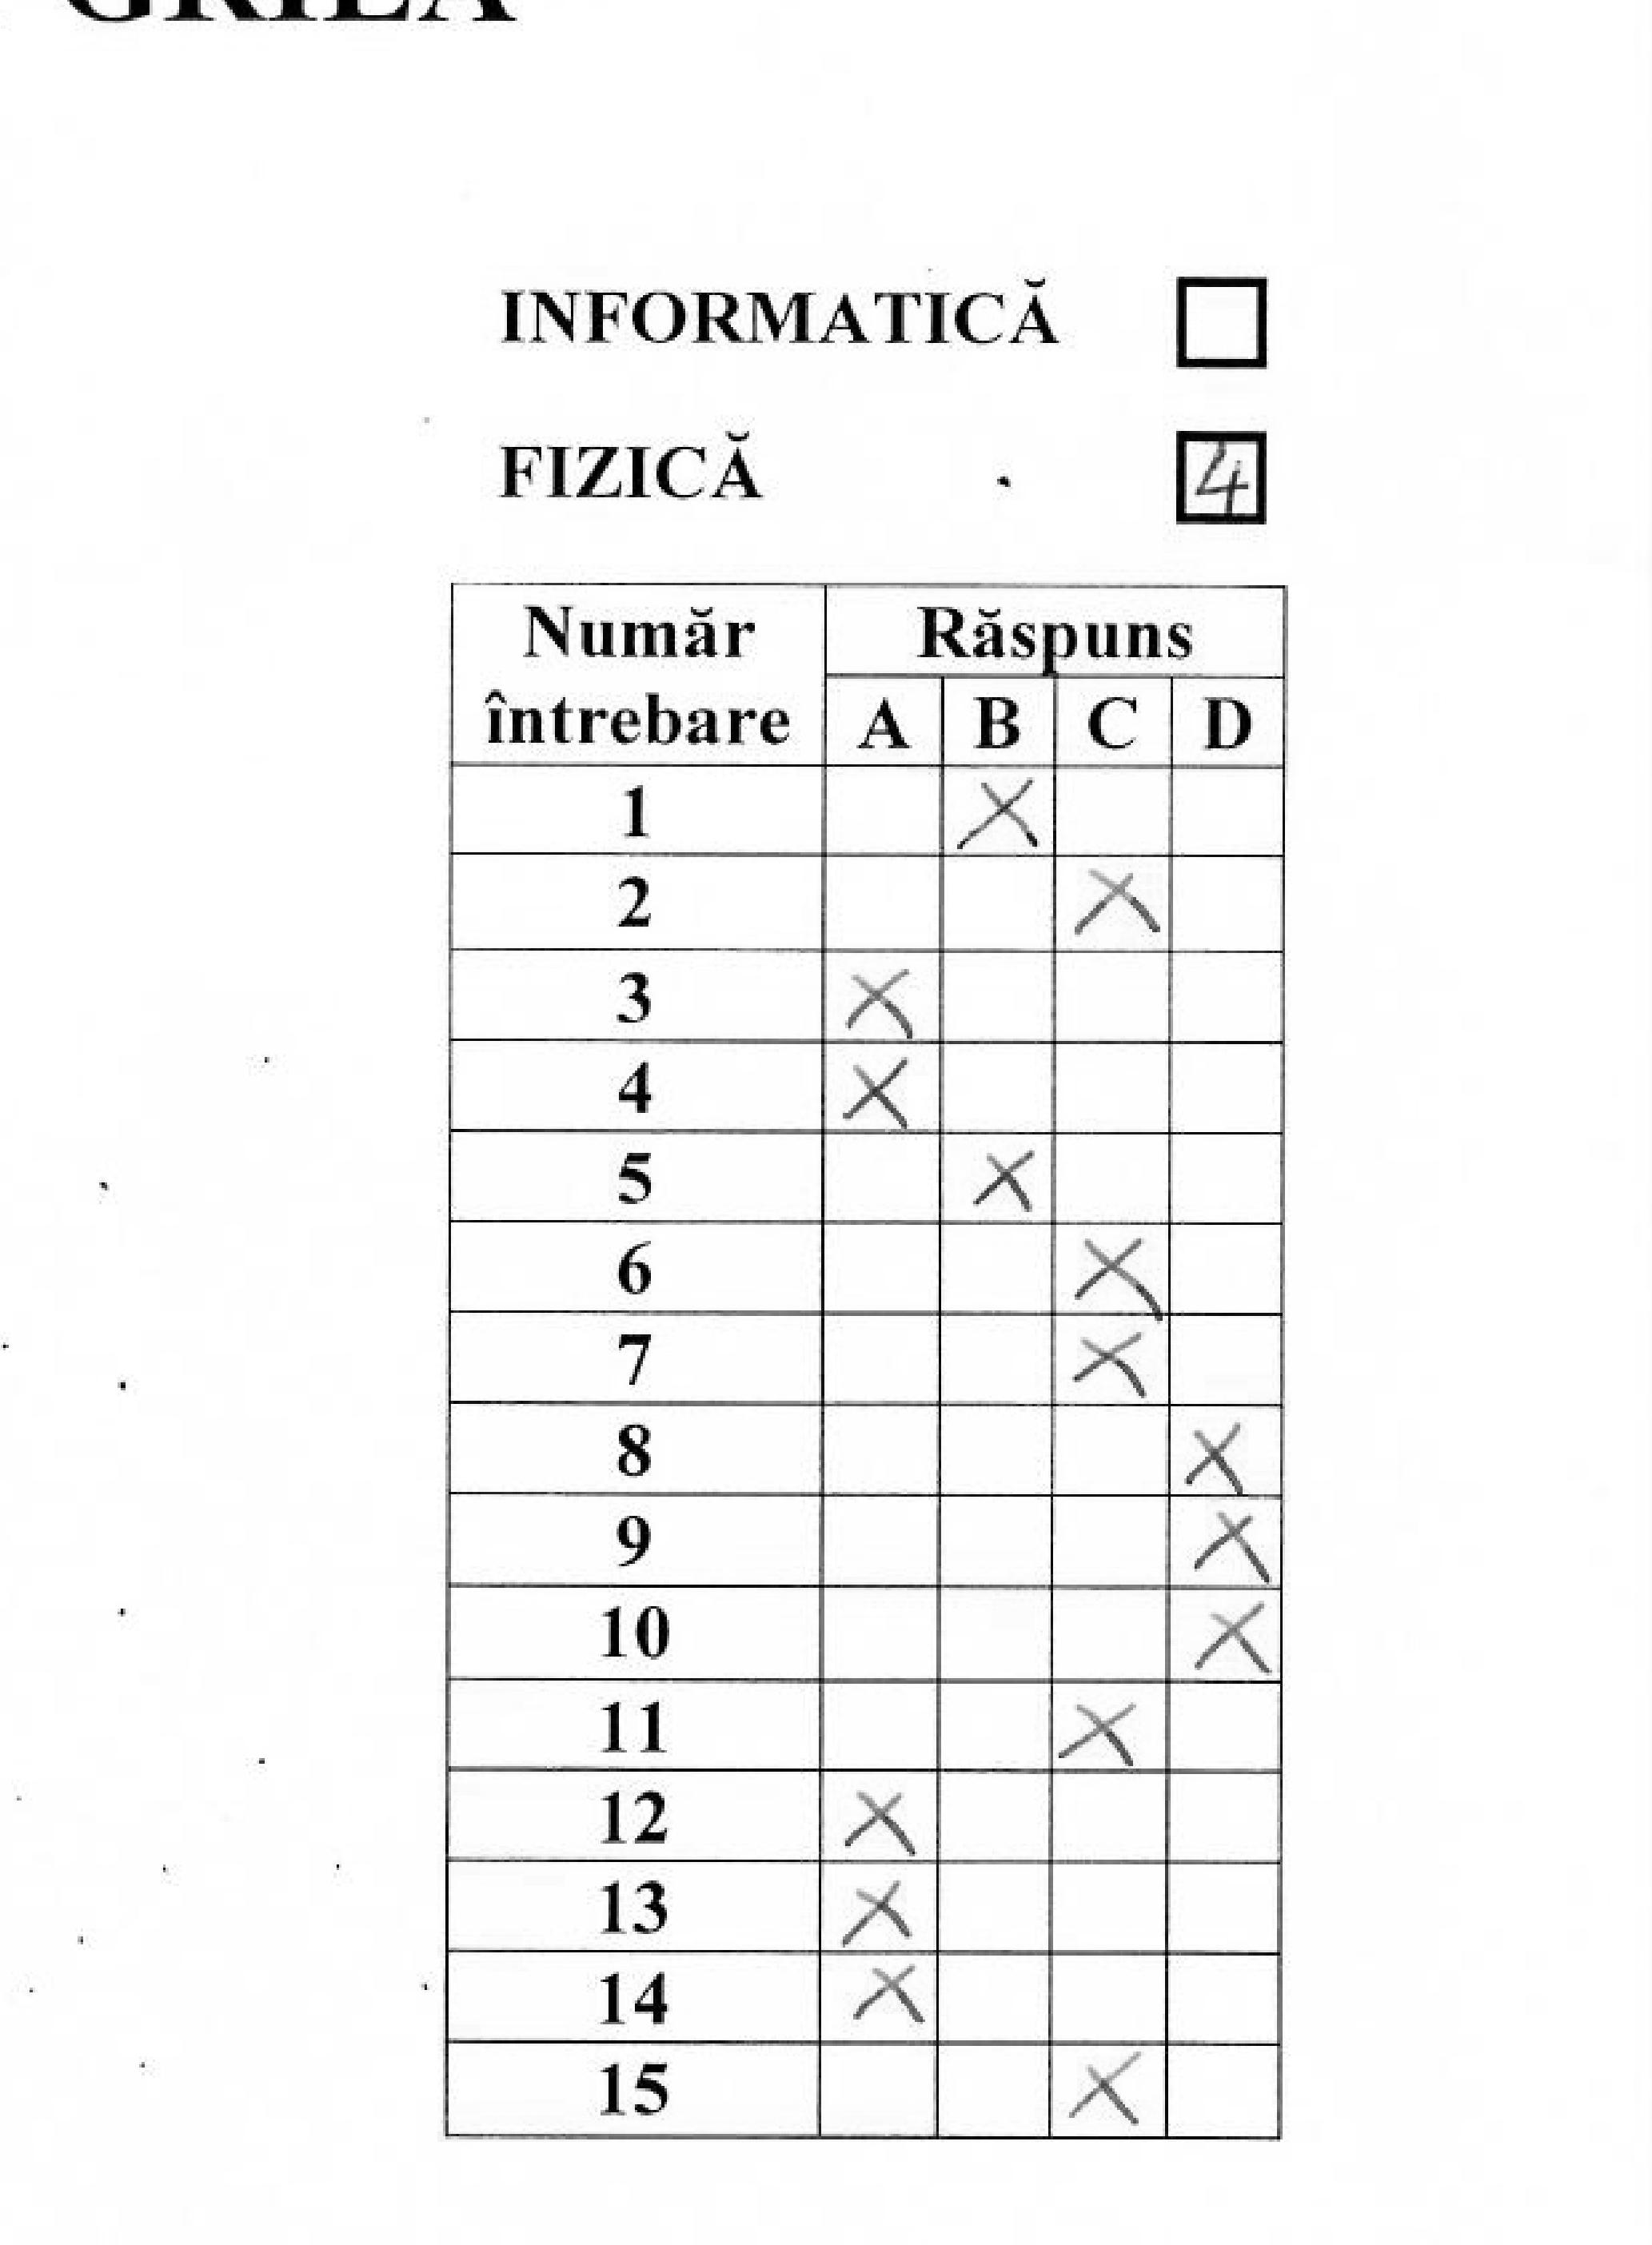

[[(1022, 0), (1022, 2808)], [(1169, 0), (1169, 2808)], [(1312, 0), (1312, 2808)], [(1456, 0), (1456, 2808)], [(1599, 0), (1599, 2808)]]
[[(0, 955), (2066, 955)], [(0, 1068), (2066, 1068)], [(0, 1188), (2066, 1188)], [(0, 1301), (2066, 1301)], [(0, 1415), (2066, 1415)], [(0, 1525), (2066, 1525)], [(0, 1638), (2066, 1638)], [(0, 1755), (2066, 1755)], [(0, 1868), (2066, 1868)], [(0, 1981), (2066, 1981)], [(0, 2098), (2066, 2098)], [(0, 2211), (2066, 2211)], [(0, 2325), (2066, 2325)], [(0, 2438), (2066, 2438)], [(0, 2551), (2066, 2551)], [(0, 2671), (2066, 2671)]]
[['16' 'B']
 ['17' 'C']
 ['18' 'A']
 ['19' 'A']
 ['20' 'B']
 ['21' 'C']
 ['22' 'C']
 ['23' 'D']
 ['24' 'D']
 ['25' 'D']
 ['26' 'C']
 ['27' 'A']
 ['28' 'A']
 ['29' 'A']
 ['30' 'C']]
image_23


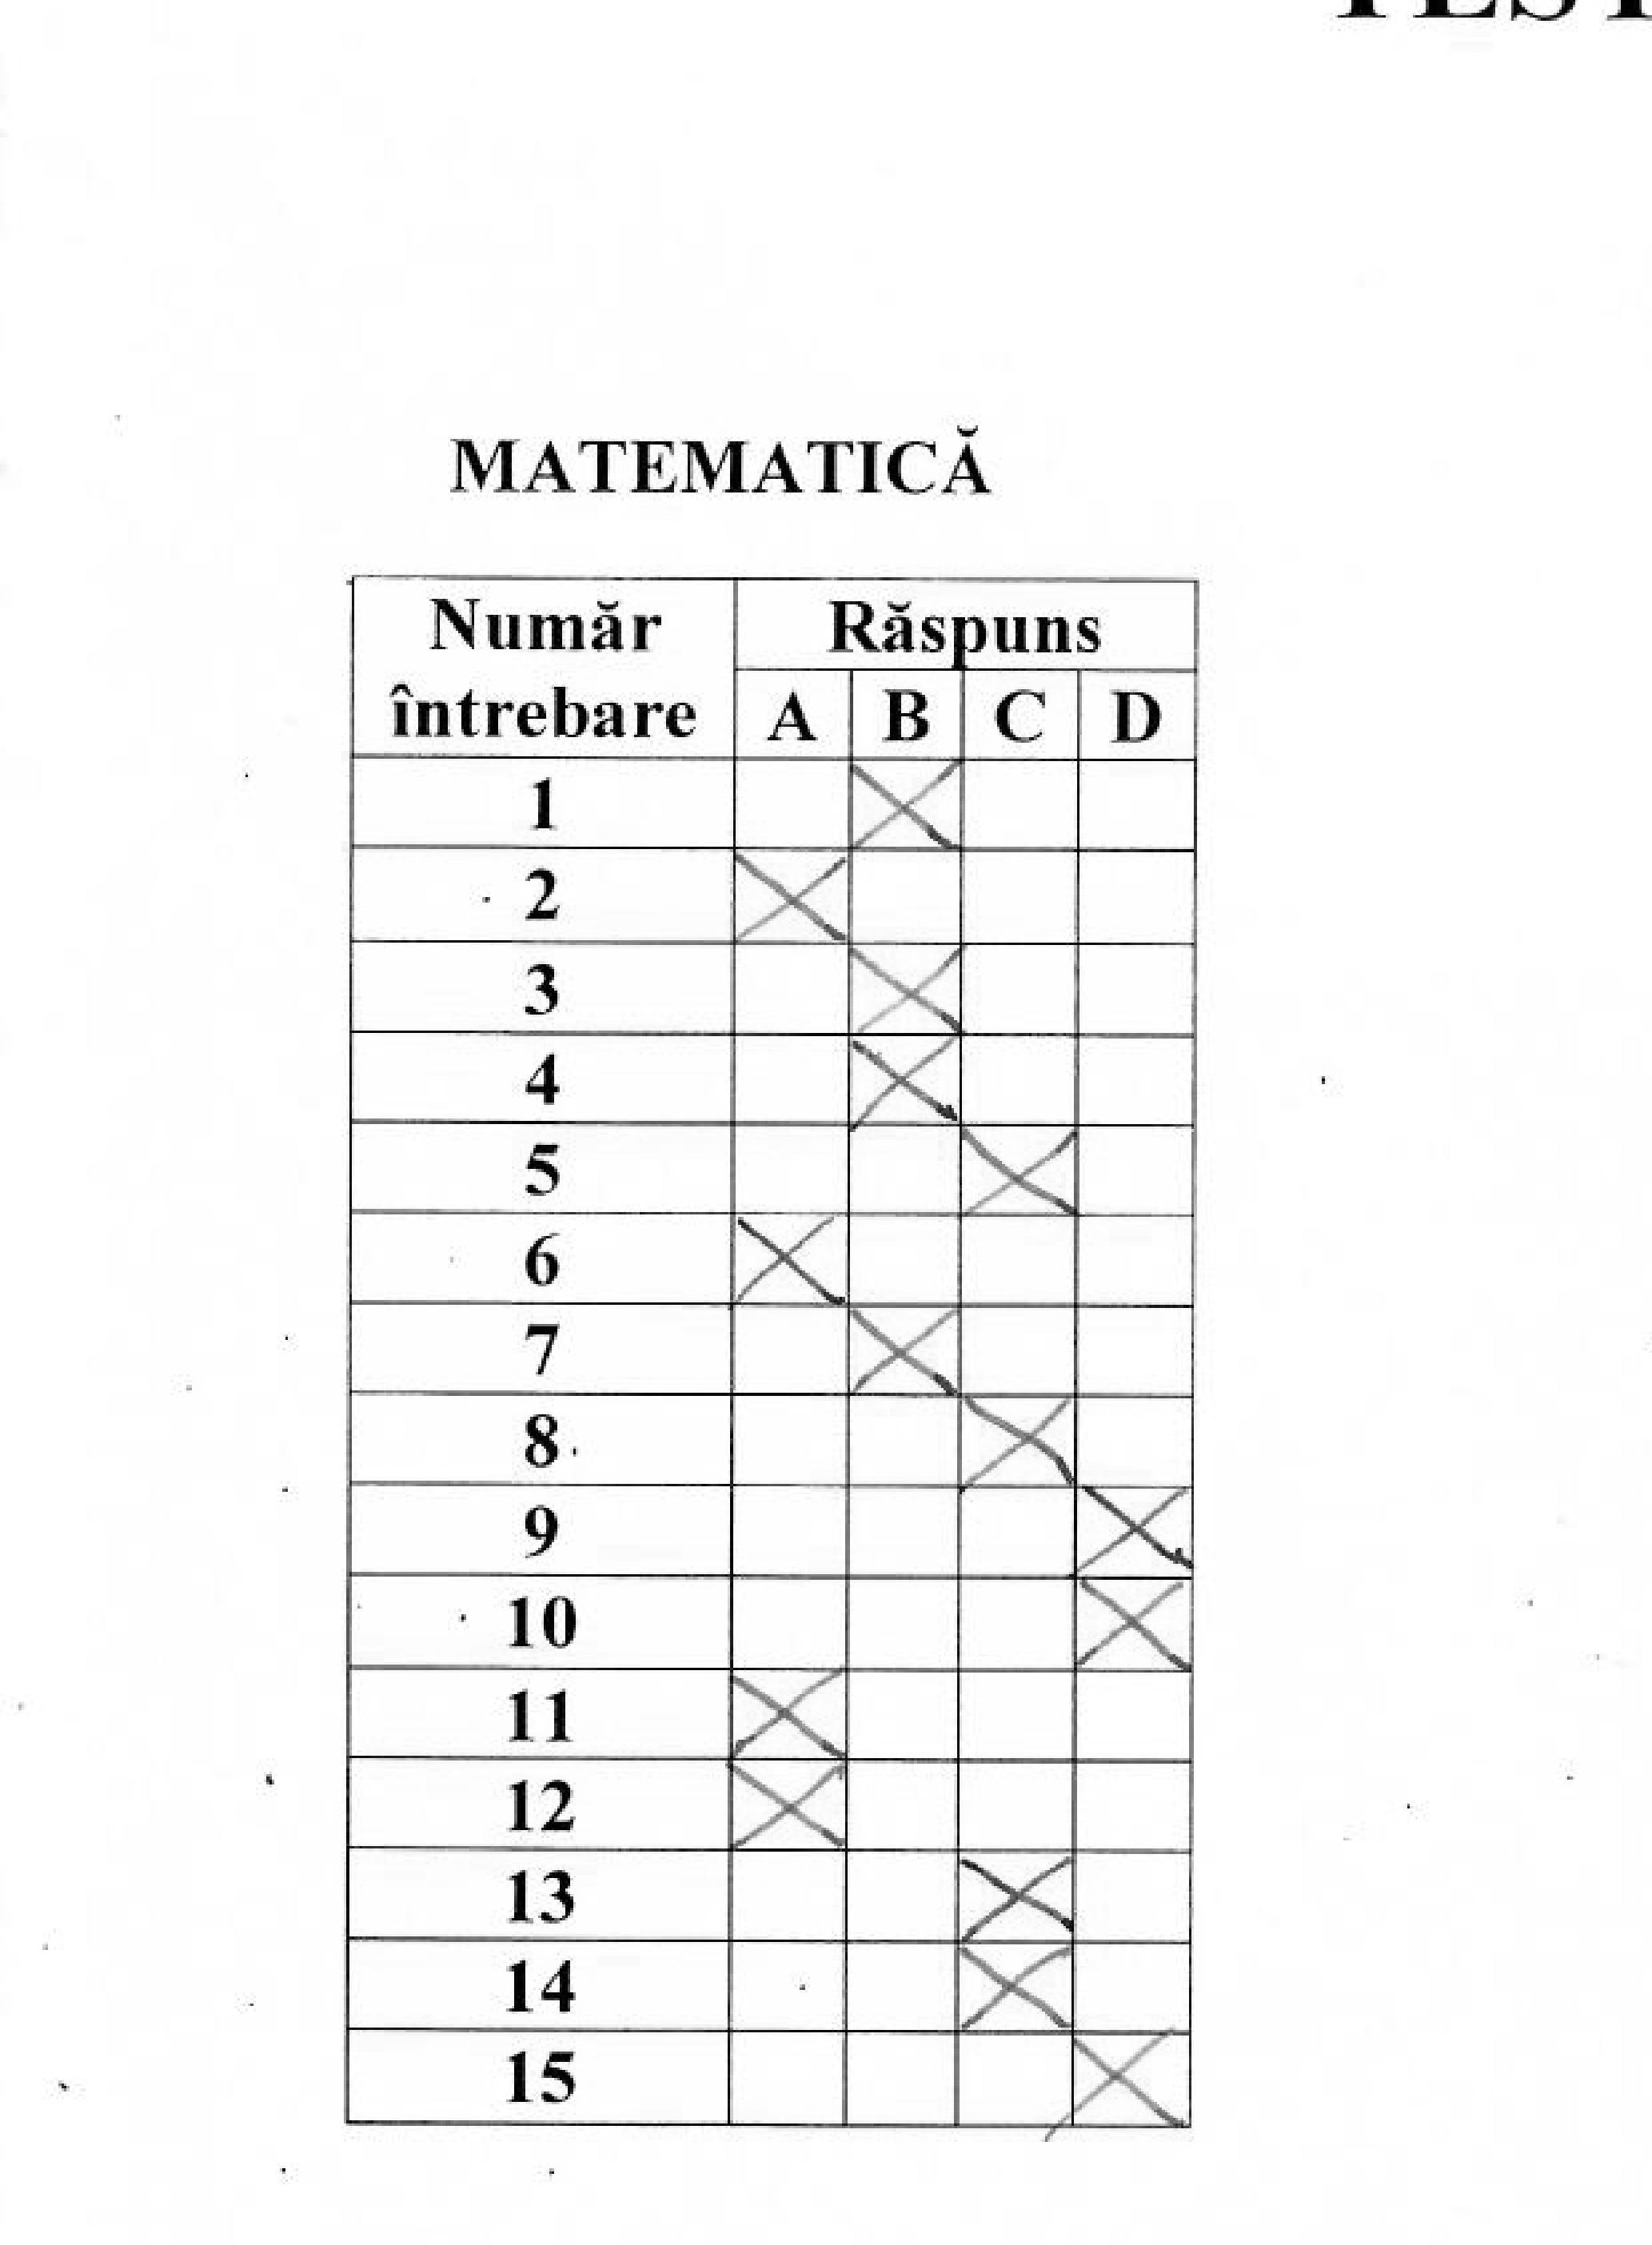

[[(911, 0), (911, 2808)], [(1055, 0), (1055, 2808)], [(1196, 0), (1196, 2808)], [(1341, 0), (1341, 2808)], [(1488, 0), (1488, 2808)]]
[[(0, 945), (2066, 945)], [(0, 1058), (2066, 1058)], [(0, 1178), (2066, 1178)], [(0, 1291), (2066, 1291)], [(0, 1405), (2066, 1405)], [(0, 1518), (2066, 1518)], [(0, 1631), (2066, 1631)], [(0, 1741), (2066, 1741)], [(0, 1858), (2066, 1858)], [(0, 1971), (2066, 1971)], [(0, 2085), (2066, 2085)], [(0, 2198), (2066, 2198)], [(0, 2311), (2066, 2311)], [(0, 2425), (2066, 2425)], [(0, 2538), (2066, 2538)], [(0, 2655), (2066, 2655)]]
[['1' 'B']
 ['2' 'A']
 ['3' 'B']
 ['4' 'B']
 ['5' 'C']
 ['6' 'A']
 ['7' 'B']
 ['8' 'C']
 ['9' 'D']
 ['10' 'D']
 ['11' 'A']
 ['12' 'A']
 ['13' 'C']
 ['14' 'C']
 ['15' 'D']]


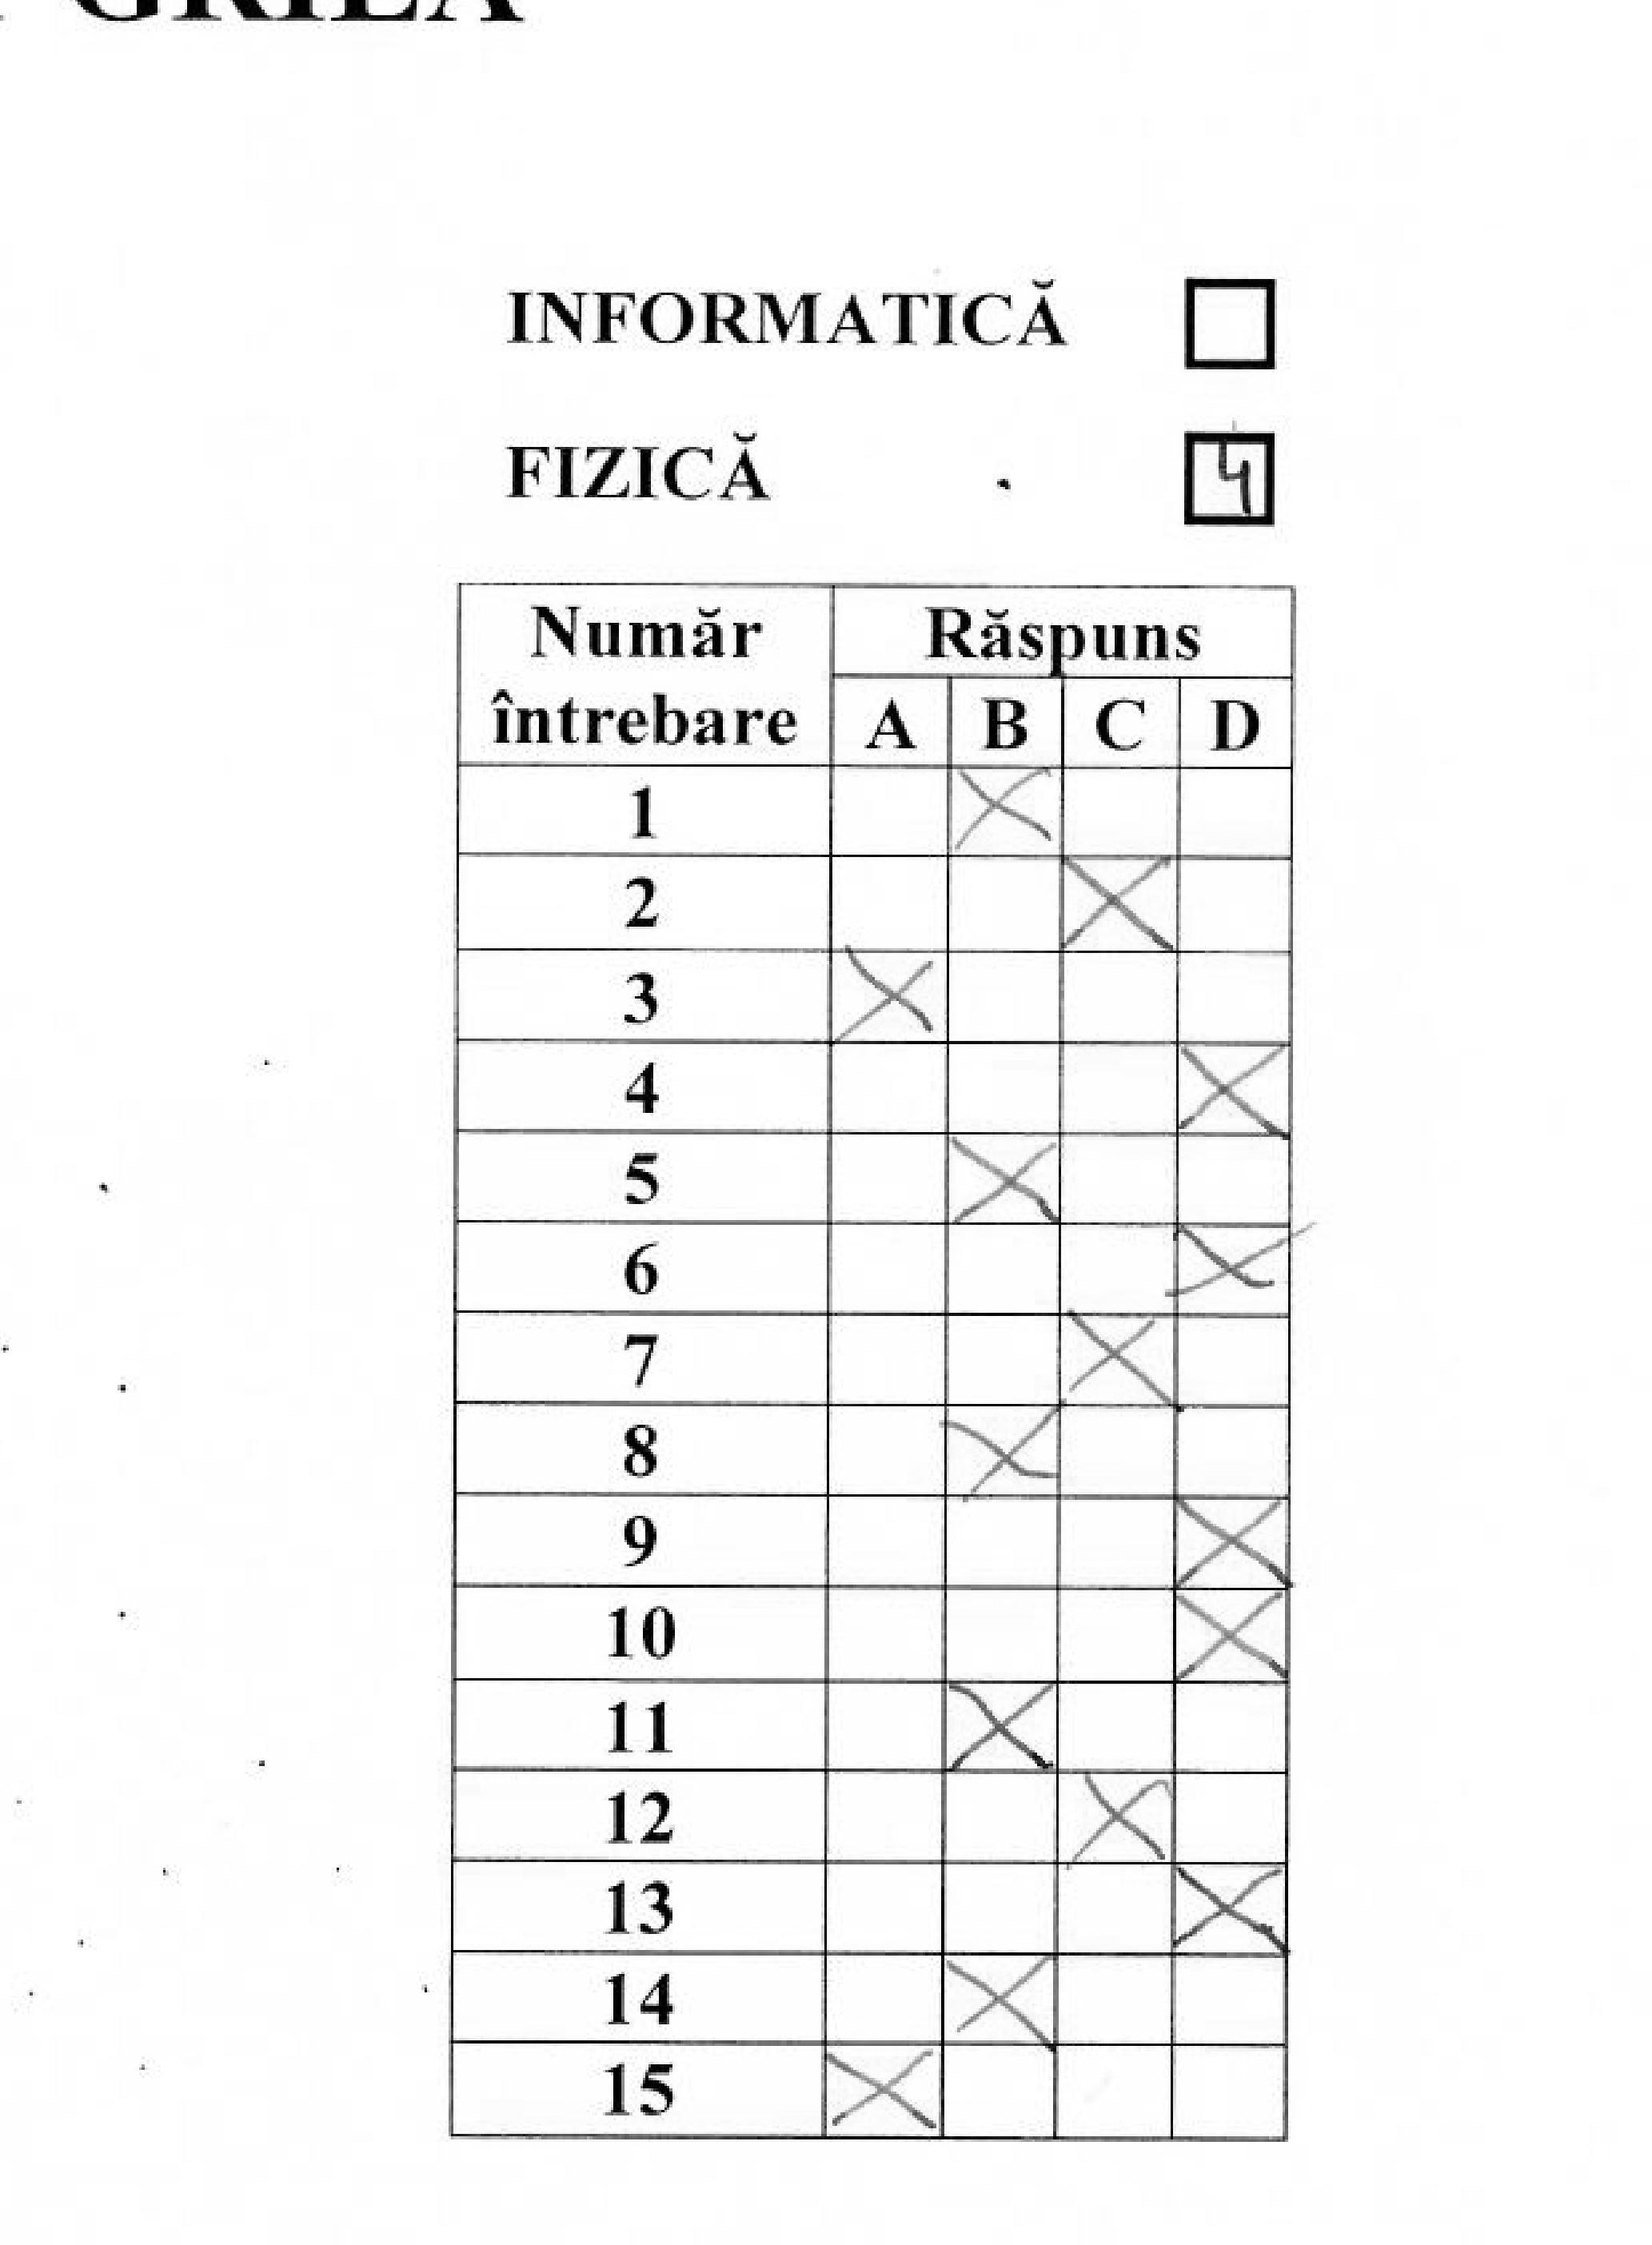

[[(1032, 0), (1032, 2808)], [(1176, 0), (1176, 2808)], [(1320, 0), (1320, 2808)], [(1465, 0), (1465, 2808)], [(1606, 0), (1606, 2808)]]
[[(0, 958), (2066, 958)], [(0, 1068), (2066, 1068)], [(0, 1188), (2066, 1188)], [(0, 1301), (2066, 1301)], [(0, 1415), (2066, 1415)], [(0, 1528), (2066, 1528)], [(0, 1641), (2066, 1641)], [(0, 1755), (2066, 1755)], [(0, 1868), (2066, 1868)], [(0, 1981), (2066, 1981)], [(0, 2101), (2066, 2101)], [(0, 2211), (2066, 2211)], [(0, 2325), (2066, 2325)], [(0, 2441), (2066, 2441)], [(0, 2551), (2066, 2551)], [(0, 2671), (2066, 2671)]]
[['16' 'B']
 ['17' 'C']
 ['18' 'A']
 ['19' 'D']
 ['20' 'B']
 ['21' 'D']
 ['22' 'C']
 ['23' 'B']
 ['24' 'D']
 ['25' 'D']
 ['26' 'B']
 ['27' 'C']
 ['28' 'D']
 ['29' 'B']
 ['30' 'A']]
image_24


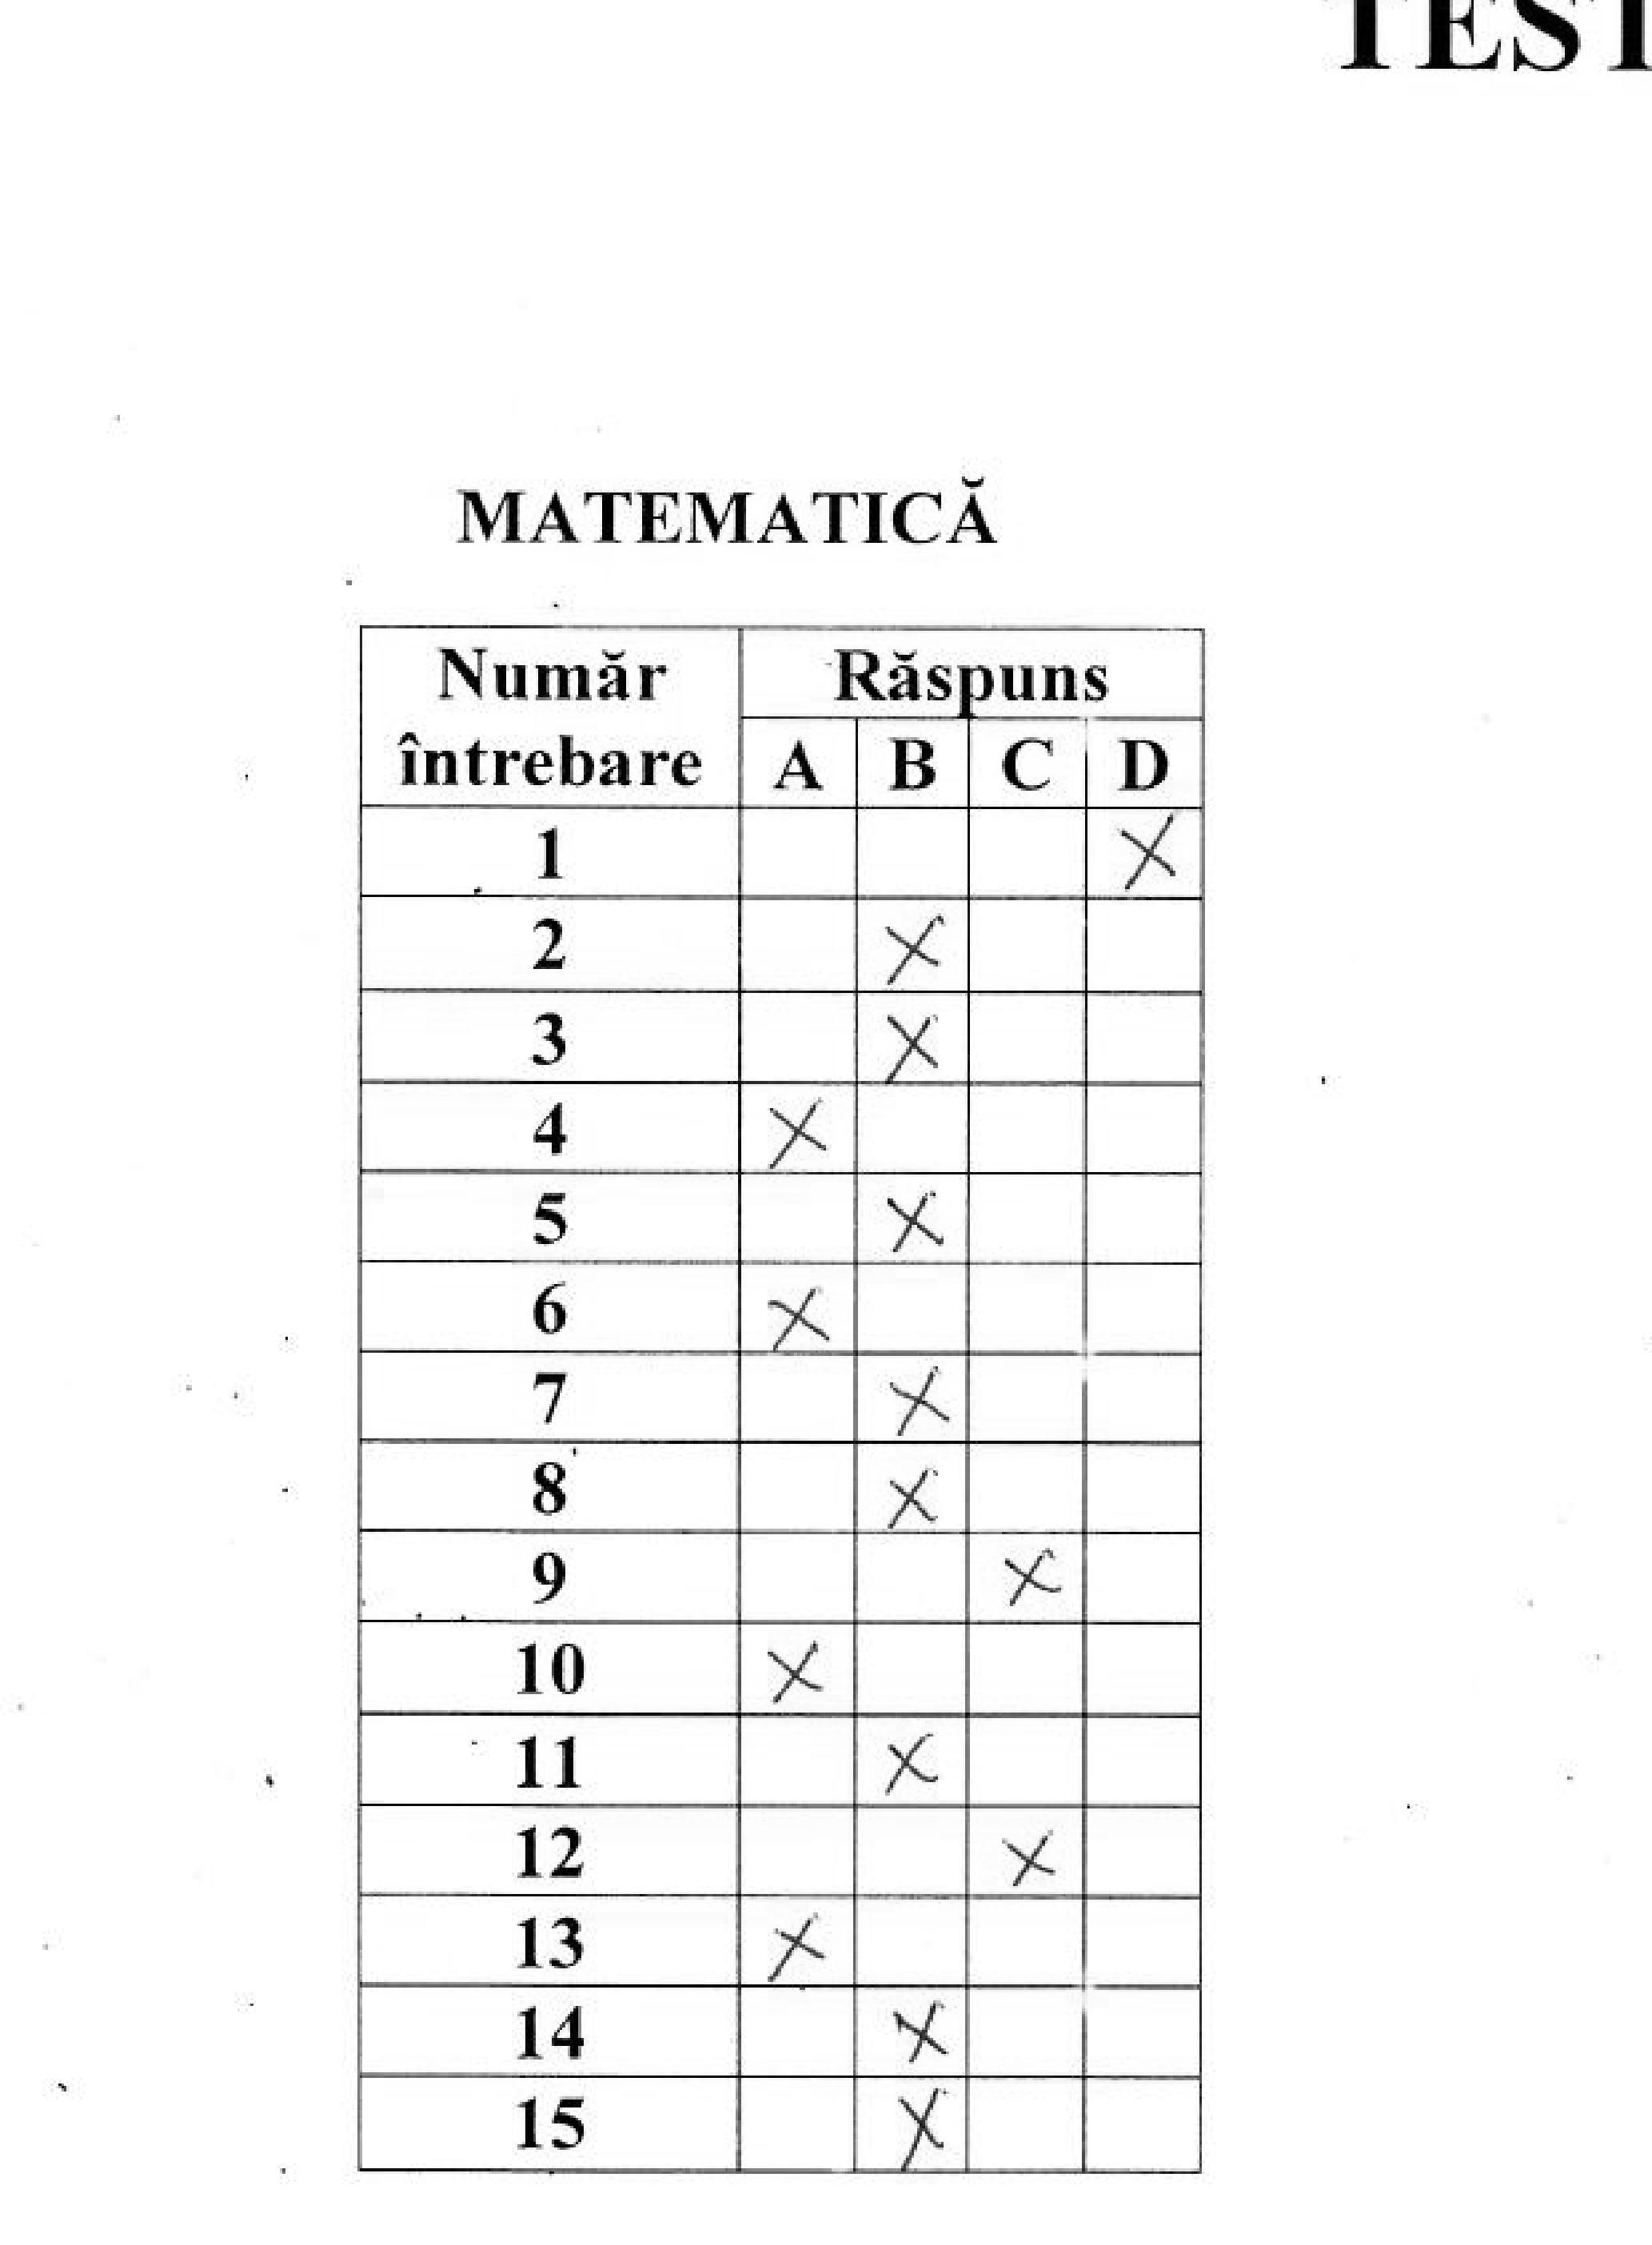

[[(919, 0), (919, 2808)], [(1065, 0), (1065, 2808)], [(1205, 0), (1205, 2808)], [(1351, 0), (1351, 2808)], [(1498, 0), (1498, 2808)]]
[[(0, 1008), (2066, 1008)], [(0, 1118), (2066, 1118)], [(0, 1238), (2066, 1238)], [(0, 1351), (2066, 1351)], [(0, 1465), (2066, 1465)], [(0, 1581), (2066, 1581)], [(0, 1688), (2066, 1688)], [(0, 1800), (2066, 1800)], [(0, 1915), (2066, 1915)], [(0, 2025), (2066, 2025)], [(0, 2141), (2066, 2141)], [(0, 2255), (2066, 2255)], [(0, 2368), (2066, 2368)], [(0, 2481), (2066, 2481)], [(0, 2594), (2066, 2594)], [(0, 2711), (2066, 2711)]]
[['1' 'D']
 ['2' 'B']
 ['3' 'B']
 ['4' 'A']
 ['5' 'B']
 ['6' 'A']
 ['7' 'B']
 ['8' 'B']
 ['9' 'C']
 ['10' 'A']
 ['11' 'B']
 ['12' 'C']
 ['13' 'A']
 ['14' 'B']
 ['15' 'B']]


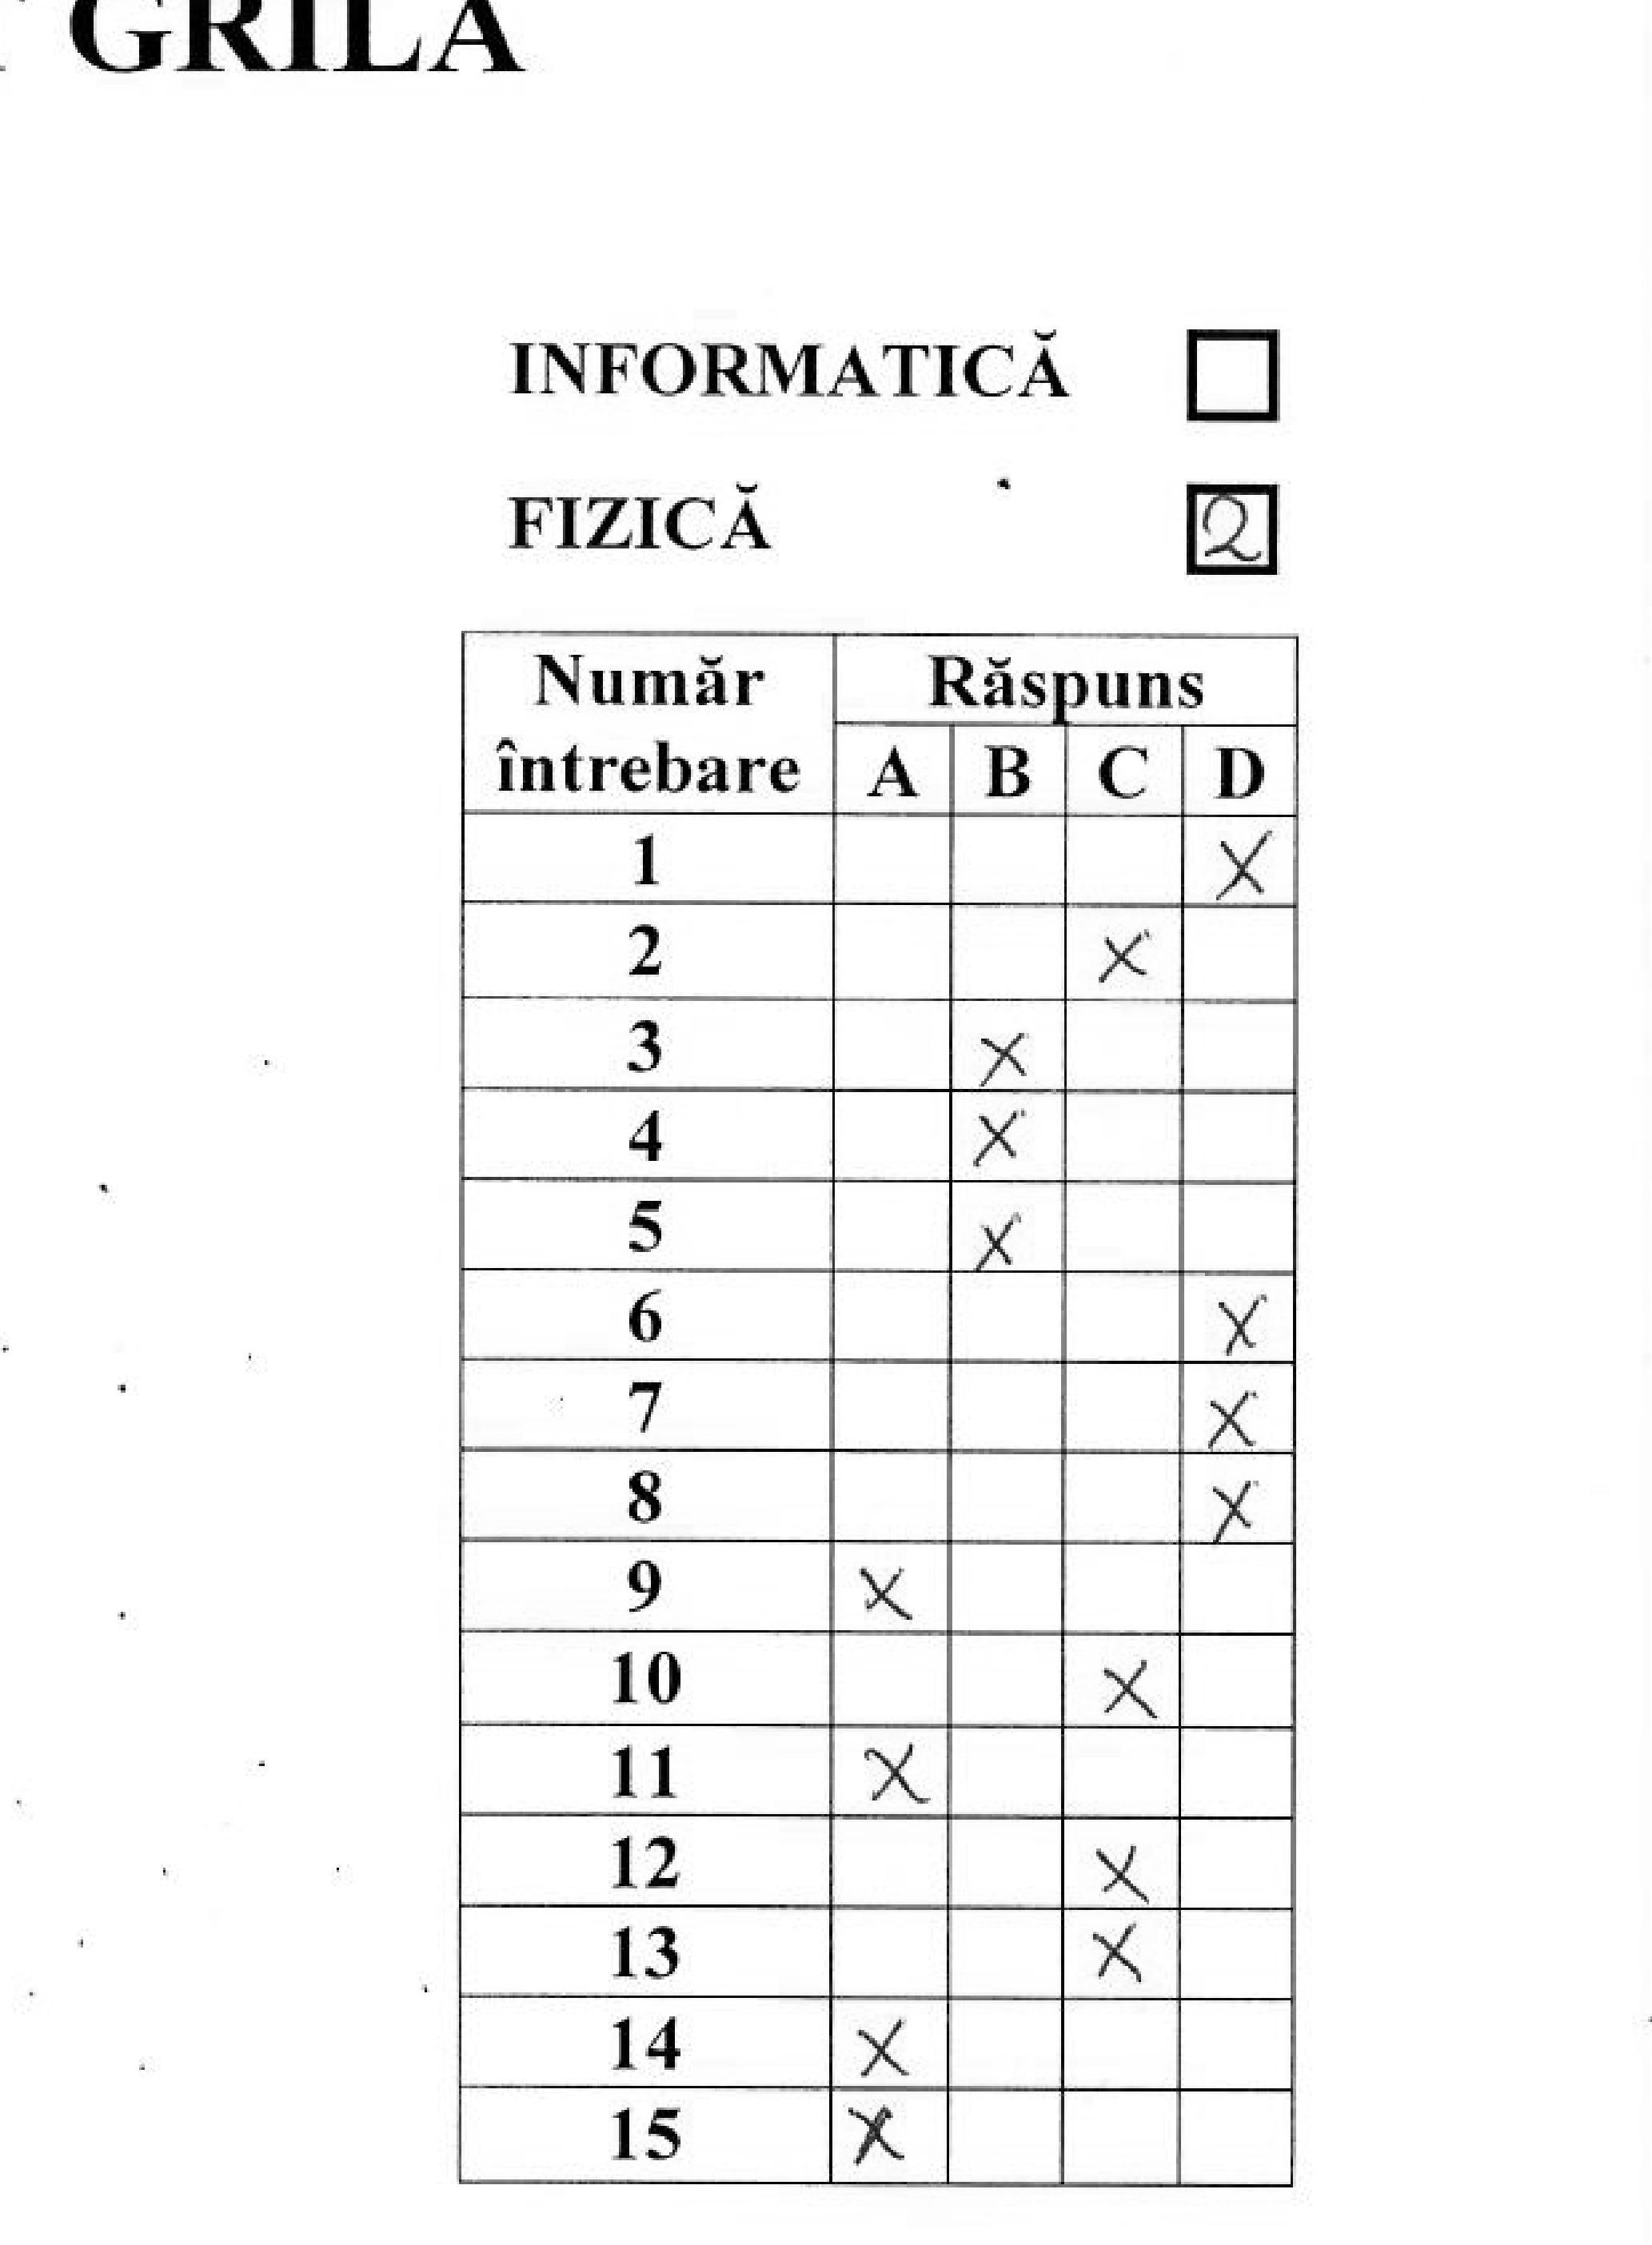

[[(1035, 0), (1035, 2808)], [(1182, 0), (1182, 2808)], [(1325, 0), (1325, 2808)], [(1472, 0), (1472, 2808)], [(1615, 0), (1615, 2808)]]
[[(0, 1015), (2066, 1015)], [(0, 1128), (2066, 1128)], [(0, 1251), (2066, 1251)], [(0, 1361), (2066, 1361)], [(0, 1475), (2066, 1475)], [(0, 1588), (2066, 1588)], [(0, 1698), (2066, 1698)], [(0, 1811), (2066, 1811)], [(0, 1928), (2066, 1928)], [(0, 2038), (2066, 2038)], [(0, 2155), (2066, 2155)], [(0, 2271), (2066, 2271)], [(0, 2381), (2066, 2381)], [(0, 2495), (2066, 2495)], [(0, 2608), (2066, 2608)], [(0, 2728), (2066, 2728)]]
[['16' 'D']
 ['17' 'C']
 ['18' 'B']
 ['19' 'B']
 ['20' 'B']
 ['21' 'D']
 ['22' 'D']
 ['23' 'D']
 ['24' 'A']
 ['25' 'C']
 ['26' 'A']
 ['27' 'C']
 ['28' 'C']
 ['29' 'A']
 ['30' 'A']]


In [22]:
# train a simple classifier on images 21, 22, 23, 24
# test this classifier on image 25
mean_x_values = []
mean_blank_values = []
for i in [21, 22, 23, 24]: 
    image_name = 'image_' + str(i)
   
    print(image_name)
    # load image
    image = cv.imread(base_folder + image_name + '.jpg')
    grayscale_image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
    orig_h, orig_w = grayscale_image.shape  
    grayscale_image = grayscale_image[int(0.4 * orig_h):-int(0.12 * orig_h)] 
    left_image = grayscale_image[:, :int(orig_w * 0.5)]
    right_image = grayscale_image[:, int(orig_w * 0.5):]
    
    # load vertical lines
    vertical_lines_left = pickle.load(open((base_folder + image_name + '_vertical_lines_left.pkl'), 'rb'))
    vertical_lines_right = pickle.load(open((base_folder + image_name + '_vertical_lines_right.pkl'), 'rb'))
    # load horizontal lines 
    horizontal_lines_left = pickle.load(open((base_folder + image_name + '_horizontal_lines_left.pkl'), 'rb'))
    horizontal_lines_right = pickle.load(open((base_folder + image_name + '_horizontal_lines_right.pkl'), 'rb'))
    
    # load ground truth
    ground_truth_content = np.loadtxt(os.path.join(base_folder, '%s.txt' % image_name), dtype=str)
    ground_truth_left = ground_truth_content[1:16]
    ground_truth_right = ground_truth_content[16:-1]
    
    mean_x, mean_blank = find_x_from_gt(left_image, vertical_lines_left, horizontal_lines_left, ground_truth_left)
    mean_x_values.extend(mean_x)
    mean_blank_values.extend(mean_blank)
    
    mean_x, mean_blank = find_x_from_gt(right_image, vertical_lines_right, horizontal_lines_right, ground_truth_right)
    mean_x_values.extend(mean_x)
    mean_blank_values.extend(mean_blank)    

[222.0, 223.0, 224.0, 222.0, 221.0, 225.0, 224.0, 226.0, 219.0, 220.0, 225.0, 226.0, 224.0, 225.0, 228.0, 223.0, 226.0, 226.0, 224.0, 223.0, 226.0, 226.0, 222.0, 223.0, 225.0, 222.0, 224.0, 222.0, 220.0, 215.0, 240.0, 239.0, 237.0, 238.0, 240.0, 237.0, 243.0, 241.0, 236.0, 239.0, 238.0, 237.0, 234.0, 236.0, 235.0, 229.0, 231.0, 232.0, 229.0, 230.0, 227.0, 231.0, 230.0, 230.0, 231.0, 232.0, 232.0, 233.0, 234.0, 235.0, 226.0, 227.0, 231.0, 222.0, 225.0, 225.0, 223.0, 224.0, 221.0, 226.0, 224.0, 226.0, 216.0, 223.0, 234.0, 234.0, 227.0, 230.0, 229.0, 228.0, 229.0, 232.0, 230.0, 226.0, 228.0, 222.0, 230.0, 220.0, 231.0, 231.0, 232.0, 235.0, 234.0, 236.0, 233.0, 235.0, 235.0, 237.0, 236.0, 236.0, 236.0, 238.0, 236.0, 233.0, 234.0, 232.0, 238.0, 236.0, 235.0, 238.0, 235.0, 236.0, 237.0, 235.0, 235.0, 232.0, 236.0, 234.0, 234.0, 229.0]
[254.0, 254.0, 254.0, 254.0, 254.0, 254.0, 253.0, 254.0, 254.0, 254.0, 254.0, 254.0, 254.0, 254.0, 254.0, 254.0, 254.0, 254.0, 254.0, 254.0, 254.0, 254.0, 254.

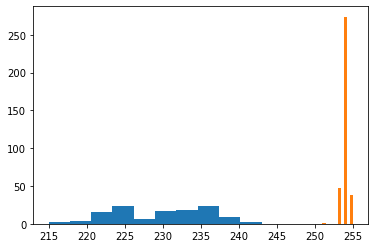

In [15]:
# build your classifier here
print(mean_x_values)
print(mean_blank_values) 
plt.hist(mean_x_values)
plt.hist(mean_blank_values)
plt.show()

In [16]:
print(np.max(mean_x_values))
print(np.min(mean_blank_values))
threshold = (np.max(mean_x_values) + np.min(mean_blank_values))/2
print(threshold)
#thr2 = (np.mean(mean_x_values) + np.mean(mean_blank_values))/2
#print(thr2)

243.0
251.0
247.0


In [31]:
# write a function that plots the patches containing X with green
# and patches containing blanks with red
# use here your classifier (test mode)
def find_x_from_img(grayscale_image, vertical_lines, horizontal_lines, threshold):
    # grayscale_image - input image containing the frame
    # vertical_lines - list with the vertical lines
    # horizontal_lines - list with horizontal lines
    # threshold - simple 1D classifier    
    
    image = np.dstack((grayscale_image, grayscale_image, grayscale_image))
    showimage(image)
    x_color = (0, 255, 0)  # plot a patch containing an X with green color
    blank_color = (0, 0, 255)  # plot a patch containing a blank with red color    
            
    # crop each patch and display it
    for i in range(len(horizontal_lines) - 1):
        for j in range(len(vertical_lines) - 1):
            x_min = vertical_lines[j][0][0] +15
            x_max = vertical_lines[j + 1][1][0] - 5
            y_min = horizontal_lines[i][0][1] + 15
            y_max = horizontal_lines[i + 1][1][1] - 5
            
            patch = grayscale_image[y_min:y_max,x_min:x_max].copy()
            #print(patch.shape)

            mean_patch_value = np.round(patch.mean())

            if(mean_patch_value <= threshold):
              color = x_color

            else:
              color = blank_color


            cv.rectangle(image, (x_min, y_min), (x_max, y_max), color=color, thickness=5)
            cv.putText(image, str(mean_patch_value)[:3] ,(x_min + 10, y_min + 50), cv.FONT_HERSHEY_COMPLEX, 1, (0,0,0), 2) 
        
    showimage(cv.resize(image, (0, 0), fx=0.4, fy=0.3))
    #cv.waitKey(0)
    #cv.destroyAllWindows()  

image_25


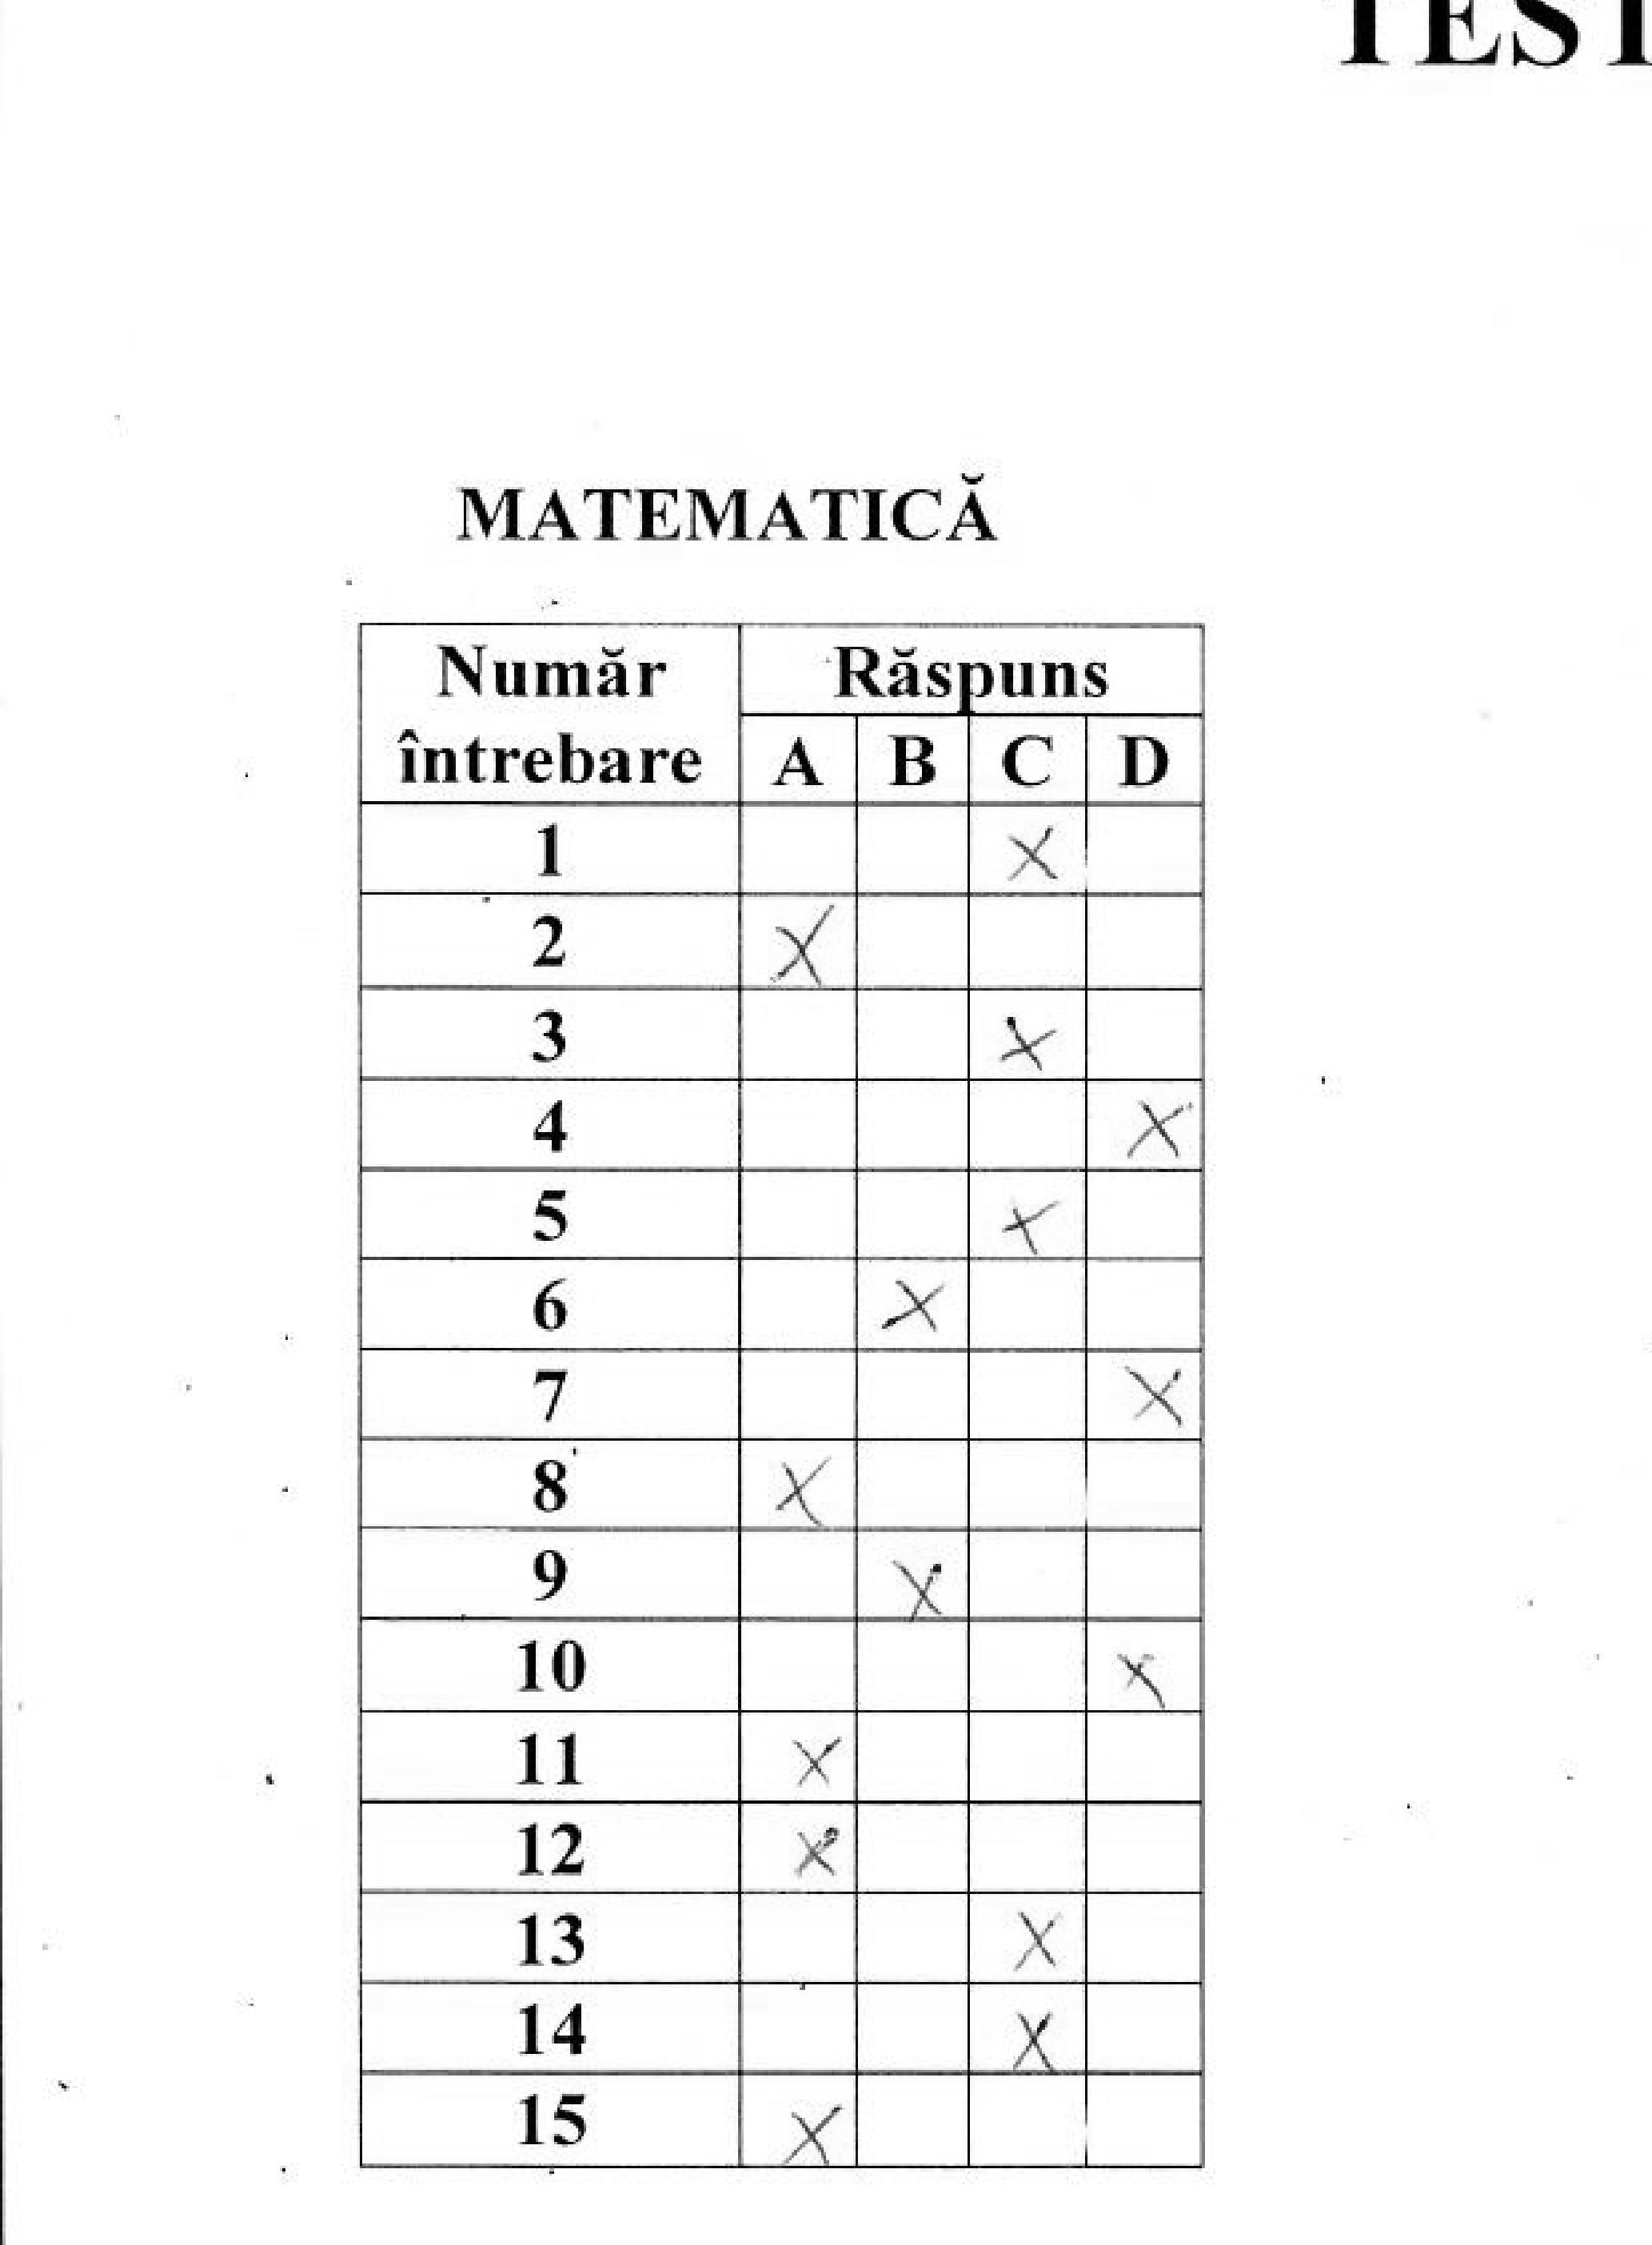

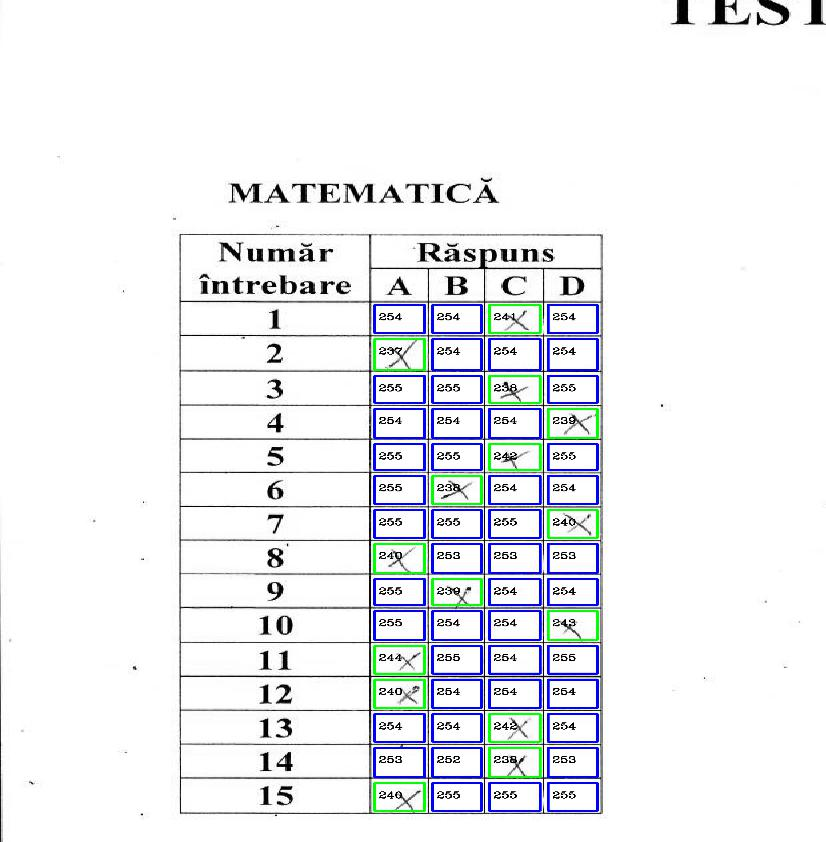

In [34]:
# test your classifier on image 25
i = 25
image_name = 'image_' + str(i)
   
print(image_name)
# load image
image = cv.imread(base_folder + image_name + '.jpg')
grayscale_image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
orig_h, orig_w = grayscale_image.shape  
grayscale_image = grayscale_image[int(0.4 * orig_h):-int(0.12 * orig_h)] 
left_image = grayscale_image[:, :int(orig_w * 0.5)]
right_image = grayscale_image[:, int(orig_w * 0.5):]
    
# load vertical lines
vertical_lines_left = pickle.load(open(os.path.join(base_folder, '%s_vertical_lines_left.pkl' % image_name), 'rb'))
vertical_lines_right = pickle.load(open(os.path.join(base_folder, '%s_vertical_lines_right.pkl' % image_name), 'rb'))
# load horizontal lines 
horizontal_lines_left = pickle.load(open(os.path.join(base_folder, '%s_horizontal_lines_left.pkl' % image_name), 'rb'))
horizontal_lines_right = pickle.load(open(os.path.join(base_folder, '%s_horizontal_lines_right.pkl' % image_name), 'rb'))  

# showimage(left_image)
# print(vertical_lines_left)
# print(vertical_lines_right)
# print(threshold)

find_x_from_img(left_image, vertical_lines_left, horizontal_lines_left, threshold)
# find_x_from_img(right_image, vertical_lines_right, horizontal_lines_right, threshold)